## 1.1 Import libraries 

In [60]:
import pandas as pd 
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

## 1.2 Import raw data from IMF

In [61]:
spain_raw = pd.read_excel('../Downloads/spain_data.xlsx', header=2)

# rename first column to 'date'
spain_raw.rename(columns={'Unnamed: 0': 'date'}, inplace=True)  

spain_raw

,date,"Economic Activity, Industrial Production, Index","Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate","International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar","Prices, Consumer Price Index, All items, Index"
0,Jan 1960,NaN,60.000,233.000000,2.857368
1,Feb 1960,NaN,60.000,253.000000,2.855049
2,Mar 1960,NaN,60.000,299.000000,2.851573
3,Apr 1960,NaN,60.000,326.000000,2.853891
4,May 1960,NaN,60.000,360.000000,2.845198
...,...,...,...,...,...
367,Aug 1990,57.138375,97.029,53227.717281,52.200576
368,Sep 1990,97.803577,98.467,53790.187718,52.750025
369,Oct 1990,100.909947,95.697,55428.040577,53.218335
370,Nov 1990,104.110449,93.958,56347.862332,53.165017


In [62]:
us_raw = pd.read_excel('../Downloads/us_data.xlsx', header=2)
us_raw.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

us_raw

,date,"International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar","Prices, Consumer Price Index, All items, Index"
0,Jan 1960,21478.100000,13.436946
1,Feb 1960,21395.700000,13.482806
2,Mar 1960,21344.700000,13.482806
3,Apr 1960,21278.000000,13.528666
4,May 1960,21234.300000,13.528666
...,...,...,...
367,Aug 1990,78908.838357,60.351608
368,Sep 1990,80024.166133,60.856066
369,Oct 1990,82852.196532,61.222946
370,Nov 1990,83059.402774,61.360525


In [63]:
merged_df = pd.merge(spain_raw, us_raw, on='date')
merged_df

,date,"Economic Activity, Industrial Production, Index","Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate","International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar_x","Prices, Consumer Price Index, All items, Index_x","International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar_y","Prices, Consumer Price Index, All items, Index_y"
0,Jan 1960,NaN,60.000,233.000000,2.857368,21478.100000,13.436946
1,Feb 1960,NaN,60.000,253.000000,2.855049,21395.700000,13.482806
2,Mar 1960,NaN,60.000,299.000000,2.851573,21344.700000,13.482806
3,Apr 1960,NaN,60.000,326.000000,2.853891,21278.000000,13.528666
4,May 1960,NaN,60.000,360.000000,2.845198,21234.300000,13.528666
...,...,...,...,...,...,...,...
367,Aug 1990,57.138375,97.029,53227.717281,52.200576,78908.838357,60.351608
368,Sep 1990,97.803577,98.467,53790.187718,52.750025,80024.166133,60.856066
369,Oct 1990,100.909947,95.697,55428.040577,53.218335,82852.196532,61.222946
370,Nov 1990,104.110449,93.958,56347.862332,53.165017,83059.402774,61.360525


## 2. Data cleaning

### 2.1 Rename columns for easy reading 

In [64]:
merged_df.rename(columns={'Economic Activity, Industrial Production, Index': 'spain_industrial_production', 
                           'Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate': 'spain_exchange_rates_per_USD',
                           'International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar_x': 'spain_international_reserves_liquidity',
                           'Prices, Consumer Price Index, All items, Index_x': 'spain_consumer_prices',
                           'International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar_y': 'us_international_reserves_liquidity', 
                           'Prices, Consumer Price Index, All items, Index_y': 'us_consumer_prices'}, inplace=True)

merged_df

,date,spain_industrial_production,spain_exchange_rates_per_USD,spain_international_reserves_liquidity,spain_consumer_prices,us_international_reserves_liquidity,us_consumer_prices
0,Jan 1960,NaN,60.000,233.000000,2.857368,21478.100000,13.436946
1,Feb 1960,NaN,60.000,253.000000,2.855049,21395.700000,13.482806
2,Mar 1960,NaN,60.000,299.000000,2.851573,21344.700000,13.482806
3,Apr 1960,NaN,60.000,326.000000,2.853891,21278.000000,13.528666
4,May 1960,NaN,60.000,360.000000,2.845198,21234.300000,13.528666
...,...,...,...,...,...,...,...
367,Aug 1990,57.138375,97.029,53227.717281,52.200576,78908.838357,60.351608
368,Sep 1990,97.803577,98.467,53790.187718,52.750025,80024.166133,60.856066
369,Oct 1990,100.909947,95.697,55428.040577,53.218335,82852.196532,61.222946
370,Nov 1990,104.110449,93.958,56347.862332,53.165017,83059.402774,61.360525


In [65]:
# format the month and year variable in a date format 
merged_df['date'] = pd.to_datetime(merged_df['date'], format='%b %Y')

### 2.2 Identify outliers

We have employed 3 methods to determine if there are any outliers in our dataset.

##### 2.2.1 Using IQR and box plots

In [66]:
columns = ['spain_industrial_production', 'spain_exchange_rates_per_USD', 'spain_international_reserves_liquidity', 'spain_consumer_prices', 'us_international_reserves_liquidity', 'us_consumer_prices']

for col in columns:
    # calculate quartiles and IQR
    q25, q75 = np.percentile(merged_df[col], 25), np.percentile(merged_df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers for each column
    outliers = [x for x in merged_df[col] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers)) 

Identified outliers: 0
Identified outliers: 2
Identified outliers: 38
Identified outliers: 0
Identified outliers: 18
Identified outliers: 0


In [67]:
columns = ['spain_industrial_production', 'spain_exchange_rates_per_USD', 'spain_international_reserves_liquidity', 'spain_consumer_prices', 'us_international_reserves_liquidity', 'us_consumer_prices']

outliers_dict = {}

for col in columns:
    # Calculate quartiles and IQR
    q25, q75 = np.percentile(merged_df[col], 25), np.percentile(merged_df[col], 75)
    iqr = q75 - q25
    
    # Calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    # Identify outliers for each column
    outliers = merged_df[(merged_df[col] < lower) | (merged_df[col] > upper)]
    
    # Store outlier months in the dictionary
    outliers_dict[col] = outliers['date'].tolist()

# Print the outlier months for each column
for col, outliers_months in outliers_dict.items():
    print(f'Outliers for column "{col}": {outliers_months}')


Outliers for column "spain_industrial_production": []
Outliers for column "spain_exchange_rates_per_USD": [Timestamp('1985-02-01 00:00:00'), Timestamp('1985-03-01 00:00:00')]
Outliers for column "spain_international_reserves_liquidity": [Timestamp('1987-11-01 00:00:00'), Timestamp('1987-12-01 00:00:00'), Timestamp('1988-01-01 00:00:00'), Timestamp('1988-02-01 00:00:00'), Timestamp('1988-03-01 00:00:00'), Timestamp('1988-04-01 00:00:00'), Timestamp('1988-05-01 00:00:00'), Timestamp('1988-06-01 00:00:00'), Timestamp('1988-07-01 00:00:00'), Timestamp('1988-08-01 00:00:00'), Timestamp('1988-09-01 00:00:00'), Timestamp('1988-10-01 00:00:00'), Timestamp('1988-11-01 00:00:00'), Timestamp('1988-12-01 00:00:00'), Timestamp('1989-01-01 00:00:00'), Timestamp('1989-02-01 00:00:00'), Timestamp('1989-03-01 00:00:00'), Timestamp('1989-04-01 00:00:00'), Timestamp('1989-05-01 00:00:00'), Timestamp('1989-06-01 00:00:00'), Timestamp('1989-07-01 00:00:00'), Timestamp('1989-08-01 00:00:00'), Timestamp('198

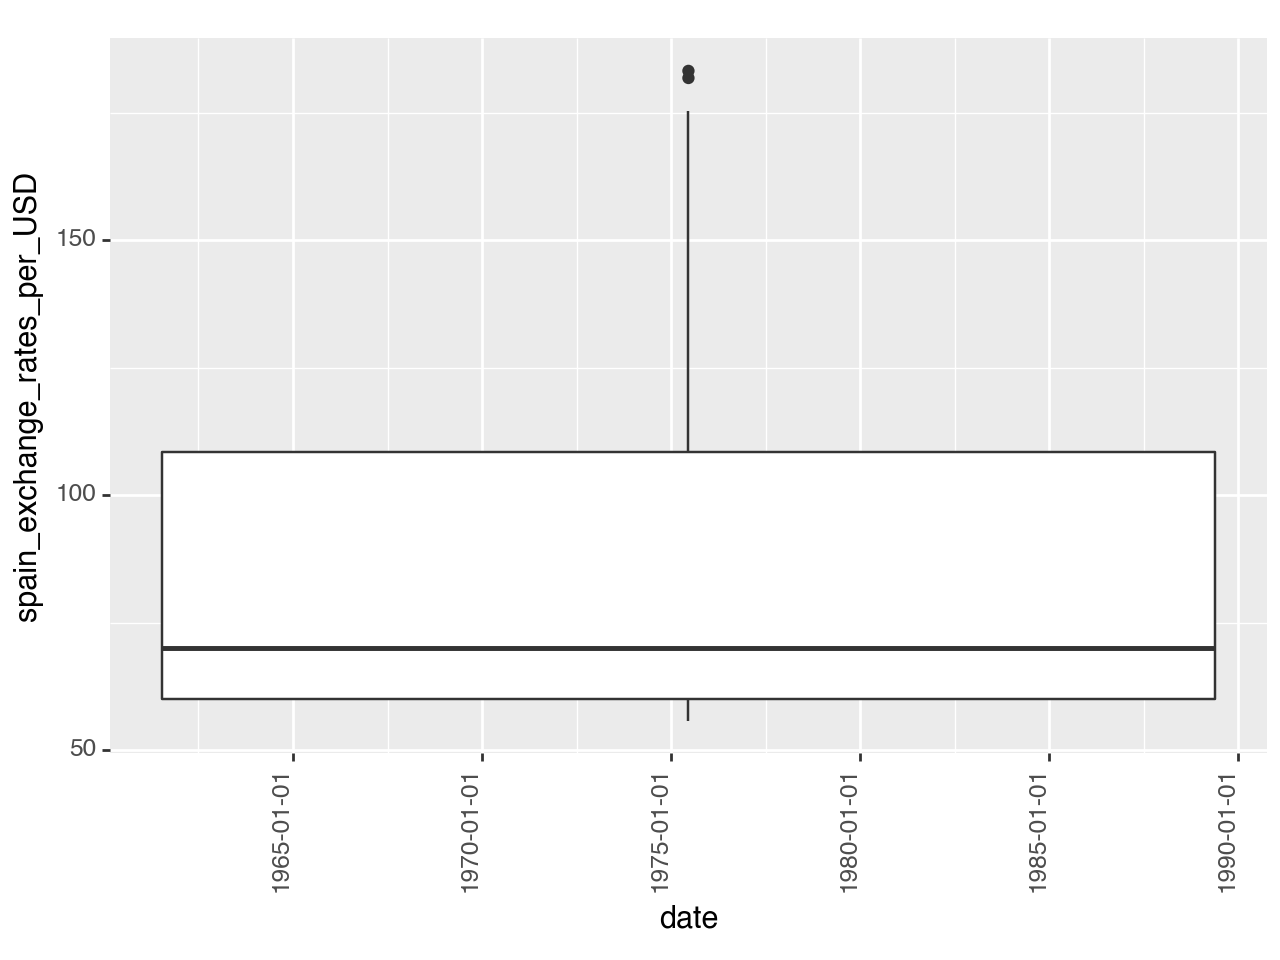

<Figure Size: (640 x 480)>

In [68]:
# create a box plot to show outliers (if any)
plot = (
    ggplot(merged_df, aes(x='date', y='spain_exchange_rates_per_USD')) +
    geom_boxplot() +
    theme(axis_text_x=element_text(rotation=90, hjust=1))
)
plot

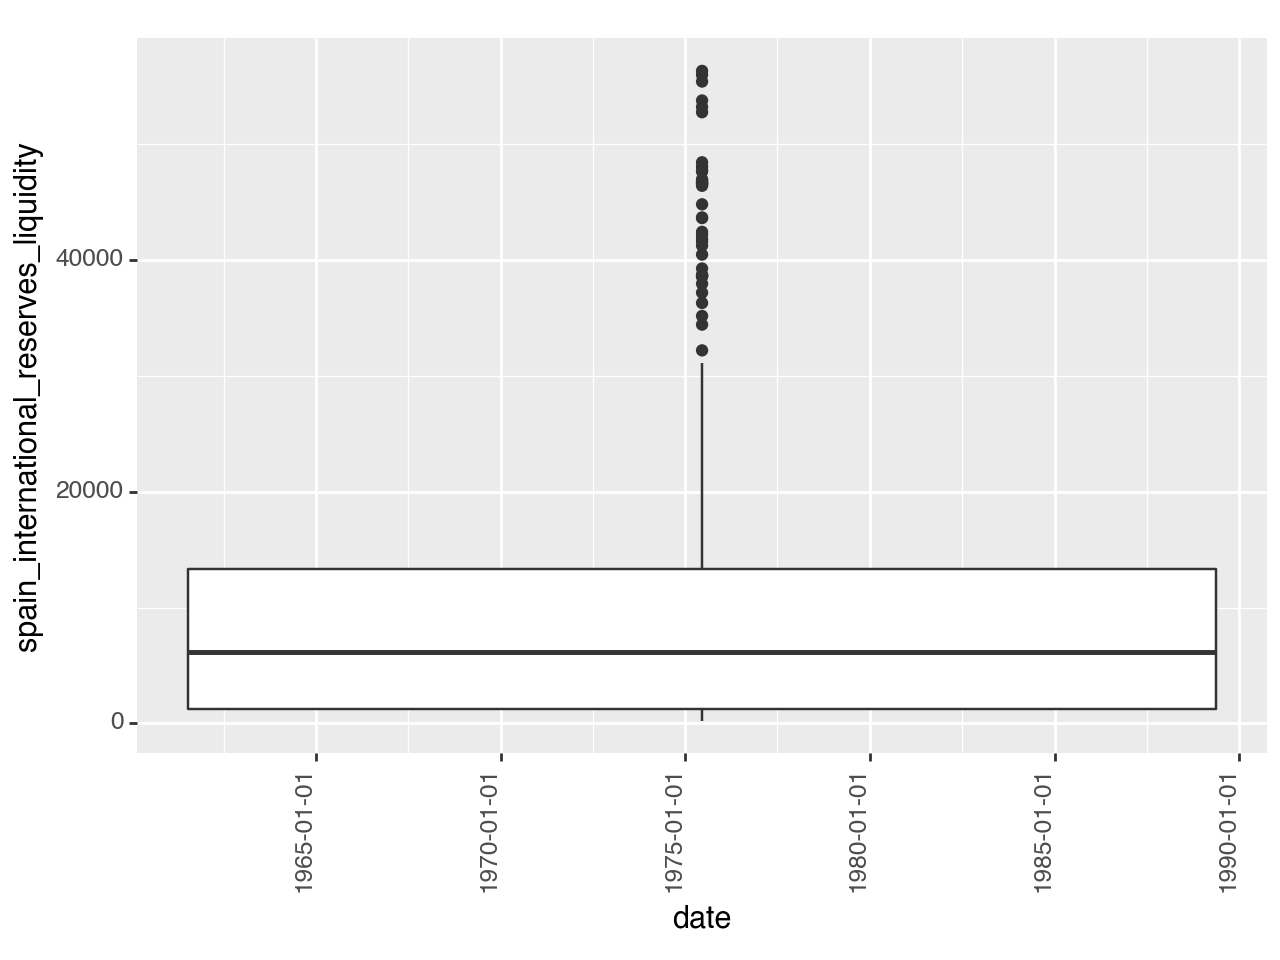

<Figure Size: (640 x 480)>

In [69]:
# create a box plot to show outliers (if any)
plot = (
    ggplot(merged_df, aes(x='date', y='spain_international_reserves_liquidity')) +
    geom_boxplot() +
    theme(axis_text_x=element_text(rotation=90, hjust=1))
)
plot

##### 2.2.2 Identifying if there are any values more than 3 standard deviations from the mean

In [70]:
spain_exchange_rates_per_USD_mean = merged_df["spain_exchange_rates_per_USD"].mean()
spain_exchange_rates_per_USD_std = merged_df["spain_exchange_rates_per_USD"].std()
spain_exchange_rates_per_USD_outliers = [x for x in merged_df["spain_exchange_rates_per_USD"] if (x > spain_exchange_rates_per_USD_mean + 3*spain_exchange_rates_per_USD_std) or (x < spain_exchange_rates_per_USD_mean - 3*spain_exchange_rates_per_USD_std)]
print('Identified outliers: %d' % len(spain_exchange_rates_per_USD_outliers))


Identified outliers: 0


##### 2.2.3 Plotting each variable on a line graph to visually check for outliers

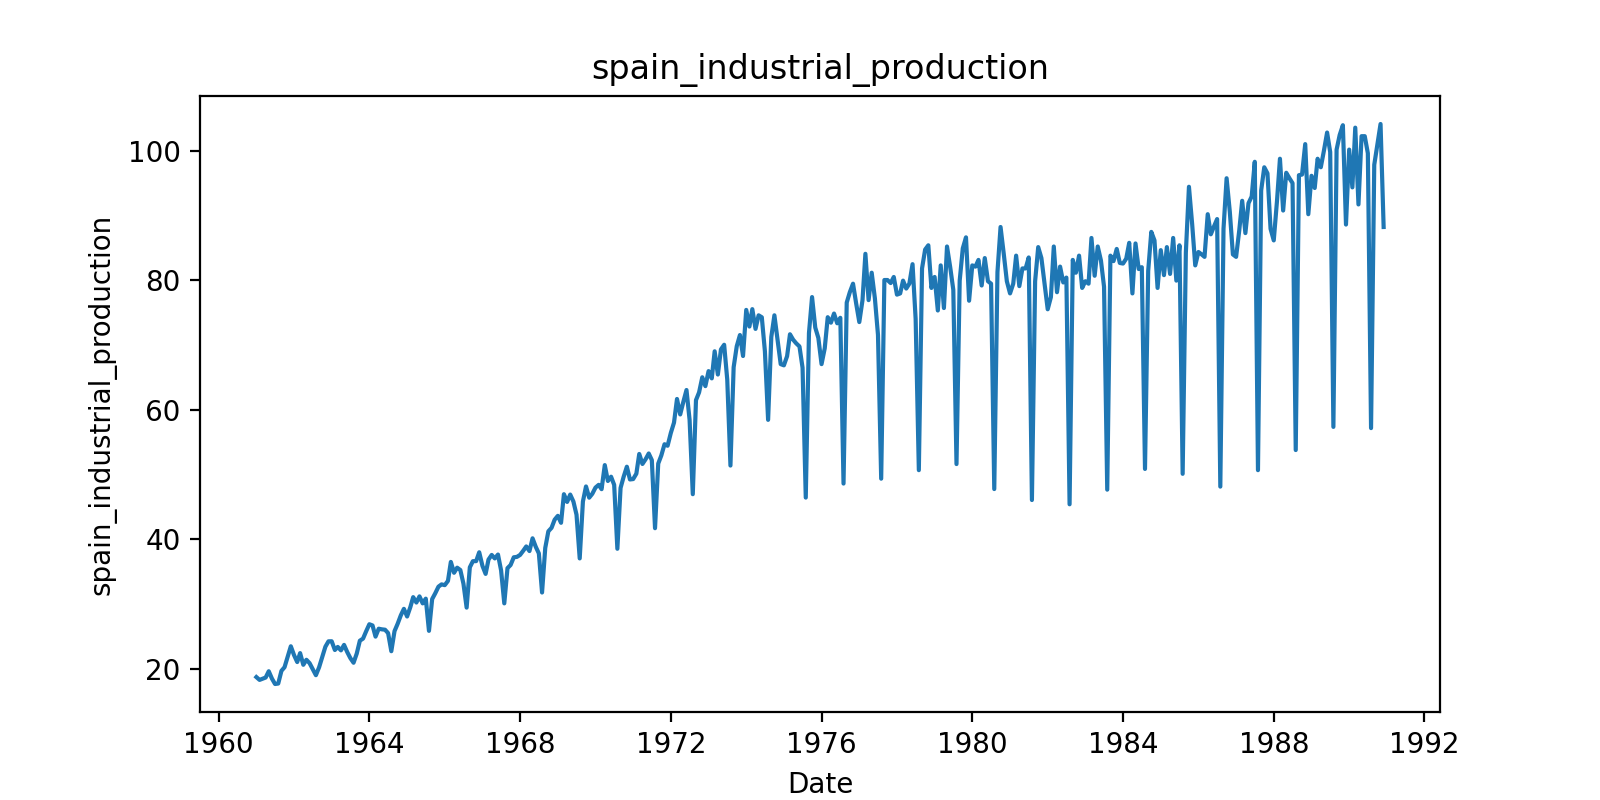

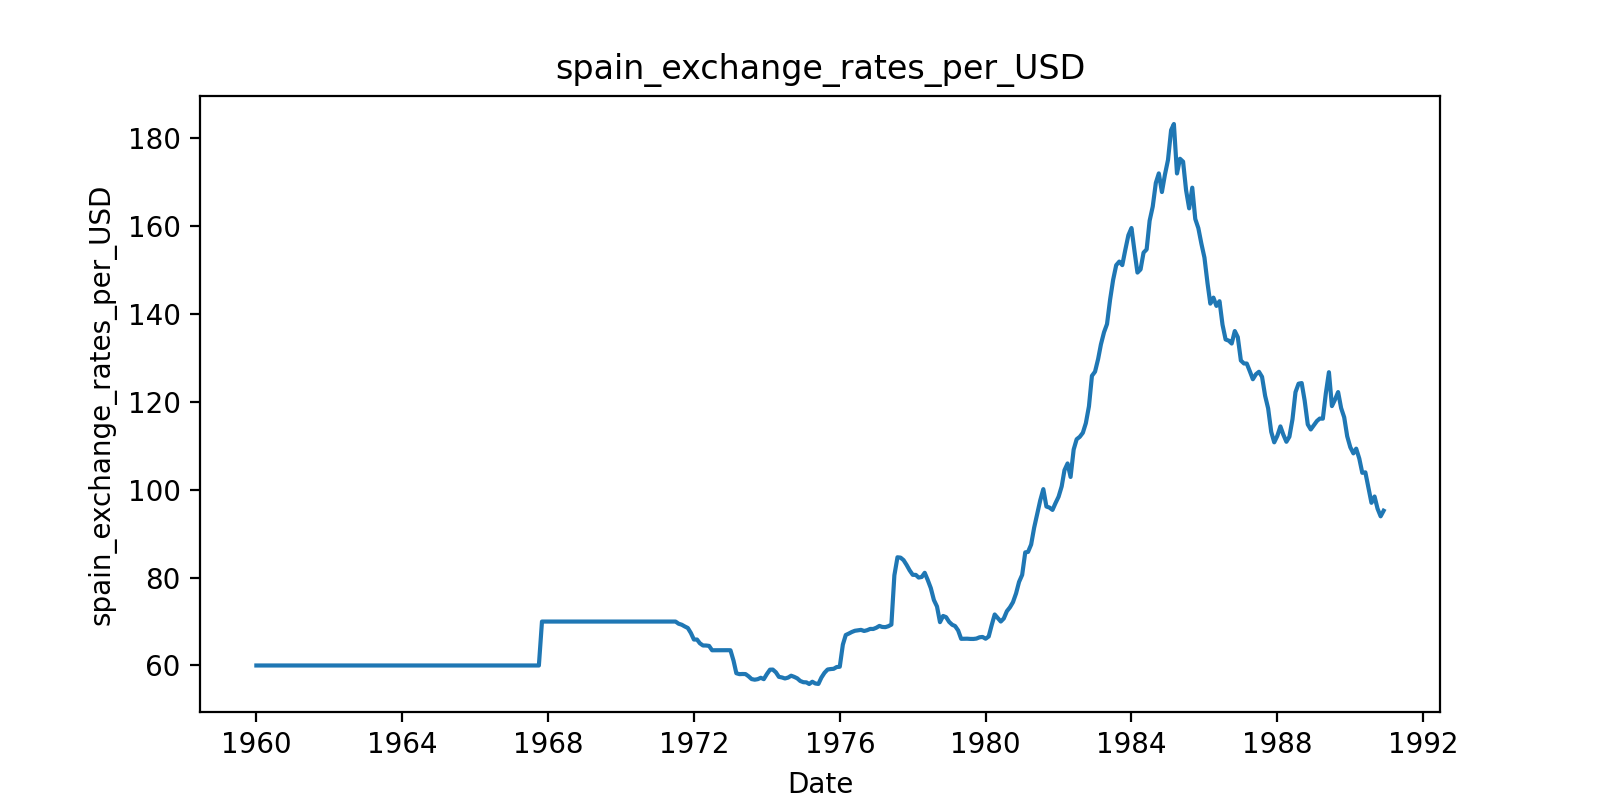

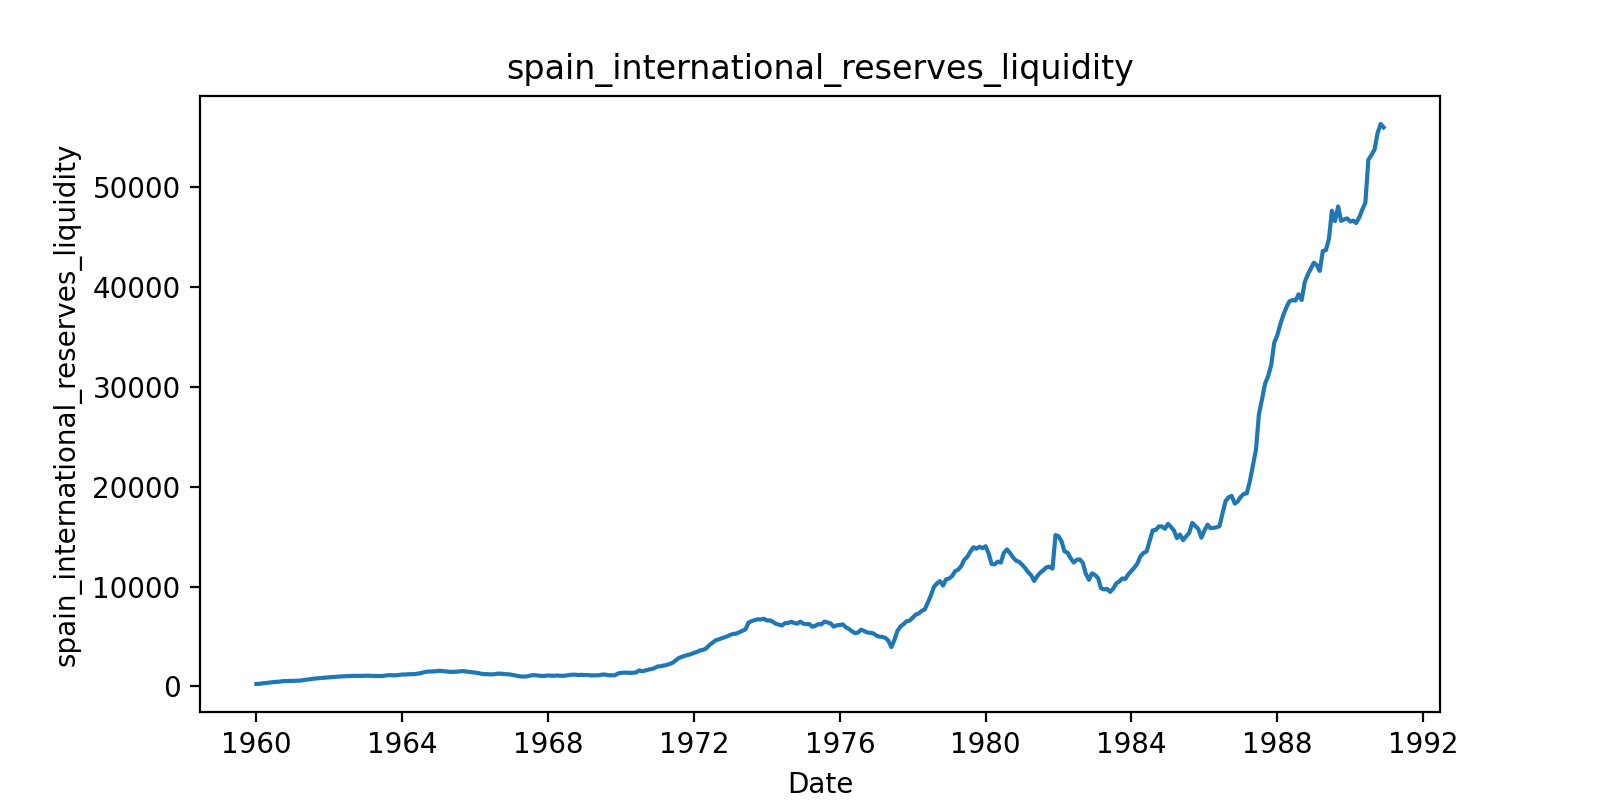

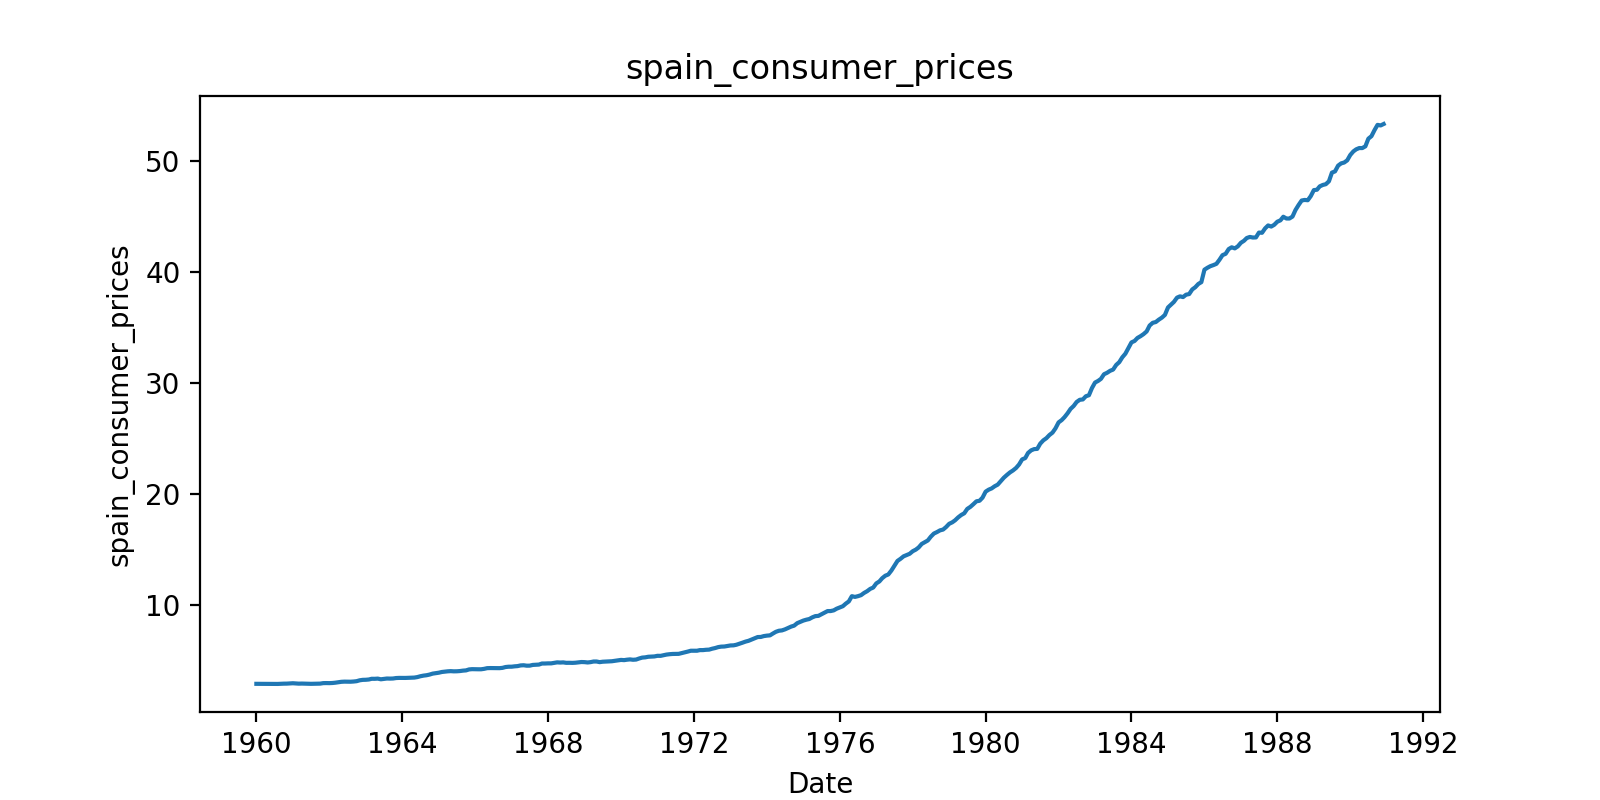

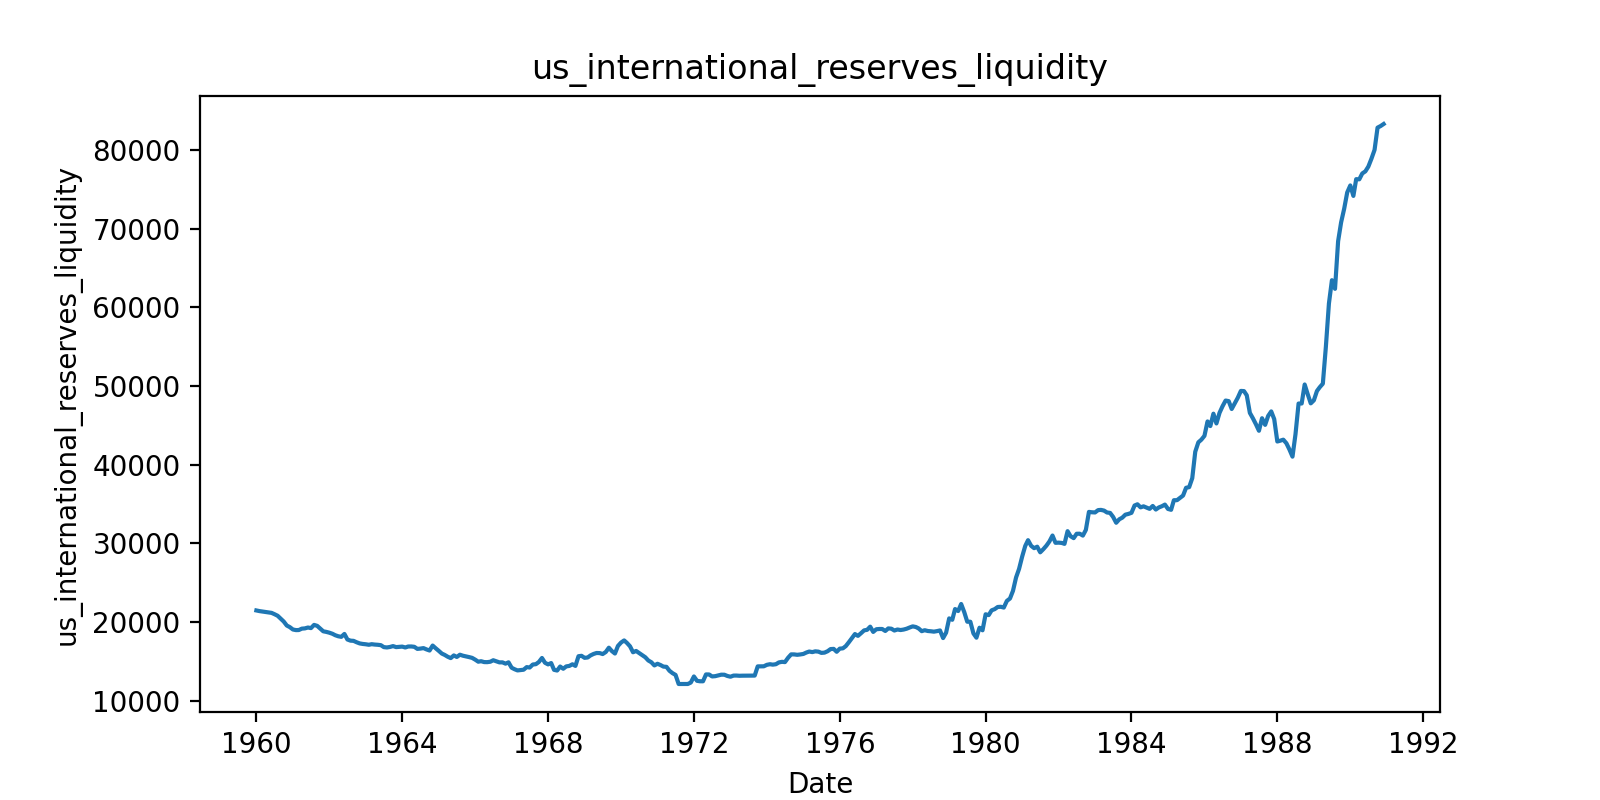

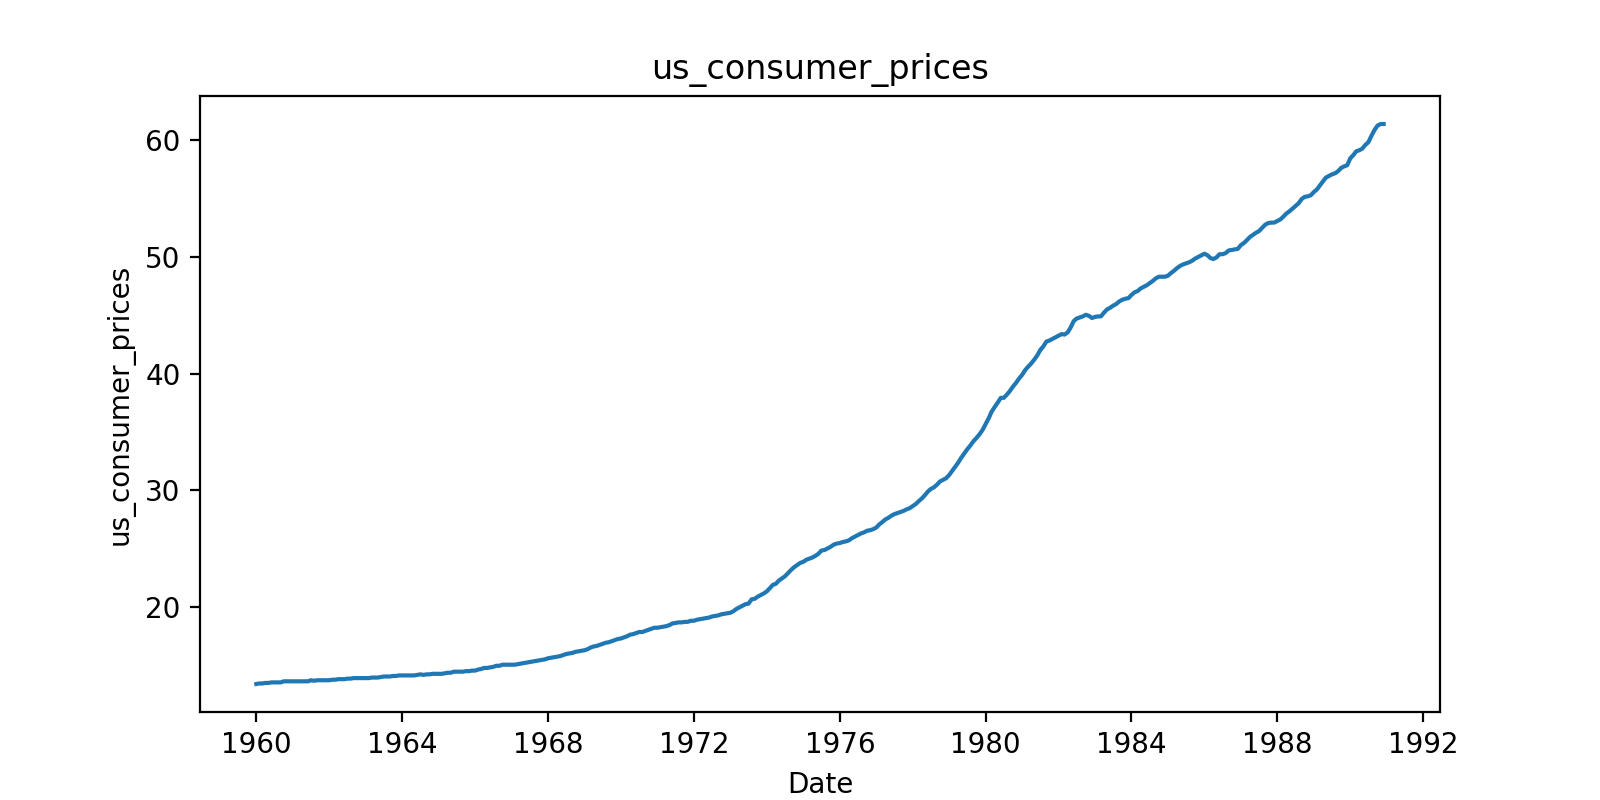

In [100]:
columns = ['spain_industrial_production', 'spain_exchange_rates_per_USD', 'spain_international_reserves_liquidity', 'spain_consumer_prices', 'us_international_reserves_liquidity', 'us_consumer_prices']
# plot each column over time 
for col in columns:
    plt.figure(figsize=(8, 4))
    plt.plot(merged_df['date'], merged_df[col])
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.show()
    

Possible explanation for outliers for spain exchange rates:  
US exchange rate in Feb 1985 was very strong, US economy was doing very well 

### 2.21 Construct new variables for Spain

In [77]:
# construct a new column for the monthly growth in the nominal exchange rate
merged_df['spain_nominal_exchange_rate_growth'] = merged_df['spain_exchange_rates_per_USD'].pct_change()

# construct a new column for the real exchange rate
# real exchange rate = (nominal exchange rate * foreign (us) price level) / domestic (spain) price level
merged_df['spain_real_exchange_rate'] = (merged_df['spain_exchange_rates_per_USD'] * merged_df['us_consumer_prices']) / merged_df['spain_consumer_prices']

# construct a new column for the monthly growth in the real exchange rate
# real exchange rate growth = (real exchange rate - previous real exchange rate) / previous real exchange rate 
merged_df['spain_real_exchange_rate_growth'] = merged_df['spain_real_exchange_rate'].pct_change()

# construct a new column for the monthly inflation rate
merged_df['spain_inflation_rate'] = merged_df['spain_consumer_prices'].pct_change()

# construct a new column for the monthly growth in industrial production
merged_df['spain_industrial_production_growth'] = merged_df['spain_industrial_production'].pct_change()

# construct a new column for the growth in industrial production vs 12 months ago
merged_df['spain_industrial_production_growth_vs_12_months_ago'] = merged_df['spain_industrial_production'].pct_change(12)

# construct a new column for an index of the value of international reserves, base month January 1960 (value of reserves at January 1960 = 100)
merged_df['spain_international_reserves_liquidity_index'] = (merged_df['spain_international_reserves_liquidity'] / merged_df['spain_international_reserves_liquidity'].iloc[0]) * 100

We will also normalise the real exchange rate to 1967-11-01 as the base year. [explain why]

In [78]:
# set 1967-11-01 as the base month for the index
merged_df['spain_real_exchange_rate_index'] = merged_df['spain_real_exchange_rate'] / merged_df['spain_real_exchange_rate'].iloc[94]

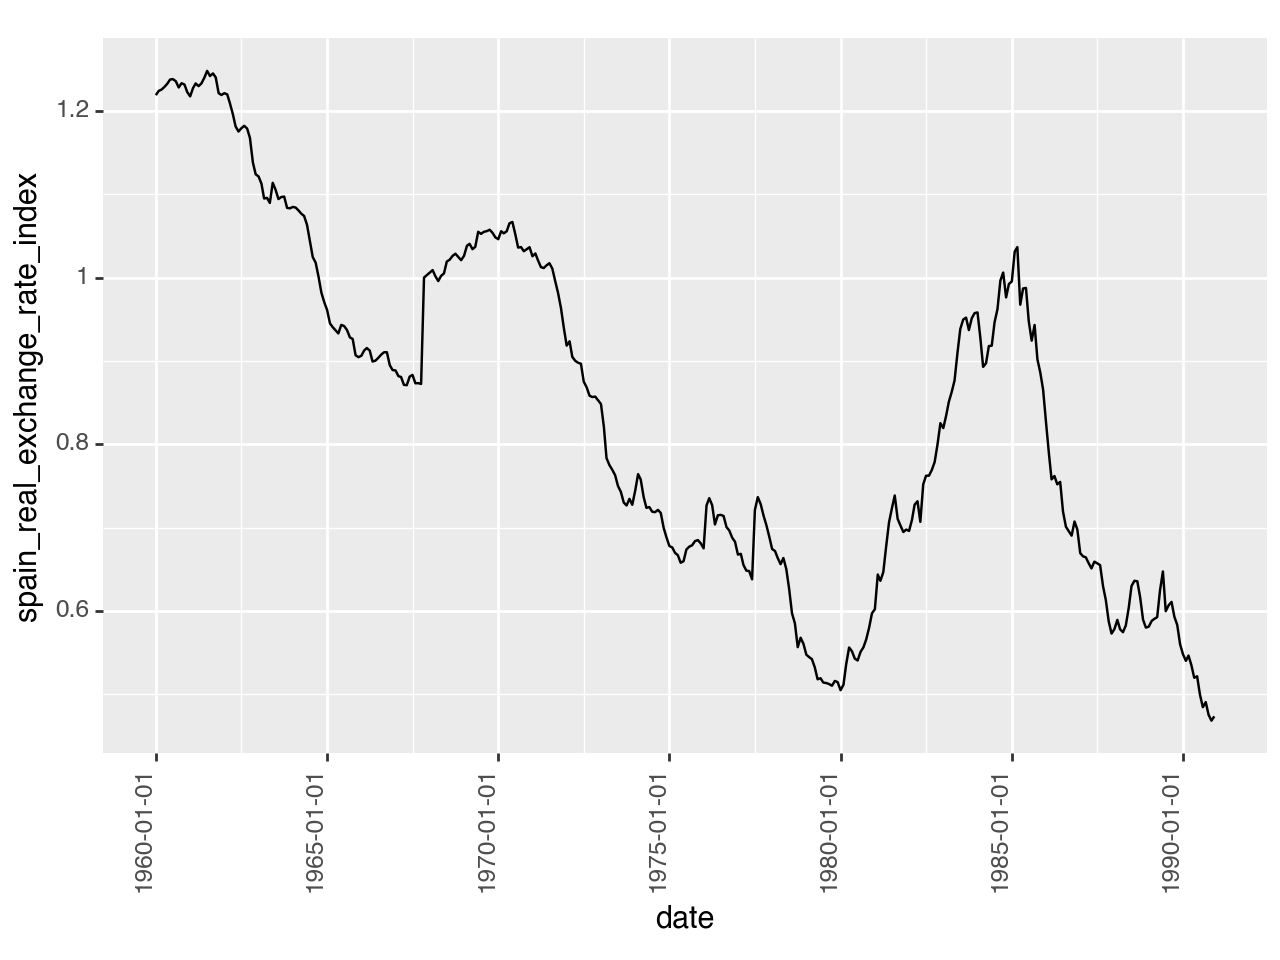

<Figure Size: (640 x 480)>

In [79]:
# plot the data for spain_real_exchange_rate_index 
plot = (
    ggplot(merged_df, aes(x='date', y='spain_real_exchange_rate_index')) +
    geom_line() +
    theme(axis_text_x = element_text(angle=90, hjust=1)) 
)

plot

### 2.22 Construct new variables for the US 

In [80]:
# construct a new column for the monthly inflation rate
merged_df['us_inflation_rate'] = merged_df['us_consumer_prices'].pct_change()

# construct a new column for an index of the value of international reserves, base month January 1960 (value of reserves at January 1960 = 100)
merged_df['us_international_reserves_liquidity_index'] = (merged_df['us_international_reserves_liquidity'] / merged_df['us_international_reserves_liquidity'].iloc[0]) * 100

merged_df

,date,spain_industrial_production,spain_exchange_rates_per_USD,spain_international_reserves_liquidity,spain_consumer_prices,us_international_reserves_liquidity,us_consumer_prices,spain_nominal_exchange_rate_growth,spain_real_exchange_rate,spain_real_exchange_rate_growth,spain_inflation_rate,spain_industrial_production_growth,spain_industrial_production_growth_vs_12_months_ago,spain_international_reserves_liquidity_index,spain_real_exchange_rate_index,us_inflation_rate,us_international_reserves_liquidity_index
0,1960-01-01,NaN,60.000,233.000000,2.857368,21478.100000,13.436946,NaN,282.153680,NaN,NaN,NaN,NaN,100.000000,1.218834,NaN,100.000000
1,1960-02-01,NaN,60.000,253.000000,2.855049,21395.700000,13.482806,0.000000,283.346534,0.004228,-0.000811,NaN,NaN,108.583691,1.223987,0.003413,99.616353
2,1960-03-01,NaN,60.000,299.000000,2.851573,21344.700000,13.482806,0.000000,283.691987,0.001219,-0.001218,NaN,NaN,128.326180,1.225479,0.000000,99.378902
3,1960-04-01,NaN,60.000,326.000000,2.853891,21278.000000,13.528666,0.000000,284.425709,0.002586,0.000813,NaN,NaN,139.914163,1.228649,0.003401,99.068353
4,1960-05-01,NaN,60.000,360.000000,2.845198,21234.300000,13.528666,0.000000,285.294743,0.003055,-0.003046,NaN,NaN,154.506438,1.232403,0.000000,98.864890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,1990-08-01,57.138375,97.029,53227.717281,52.200576,78908.838357,60.351608,-0.035075,112.179914,-0.030444,0.004383,-0.426276,-0.003284,22844.513855,0.484590,0.009202,367.392080
368,1990-09-01,97.803577,98.467,53790.187718,52.750025,80024.166133,60.856066,0.014820,113.598321,0.012644,0.010526,0.711697,-0.023496,23085.917475,0.490717,0.008359,372.584941
369,1990-10-01,100.909947,95.697,55428.040577,53.218335,82852.196532,61.222946,-0.028131,110.090860,-0.030876,0.008878,0.031761,-0.014706,23788.858617,0.475565,0.006029,385.751982
370,1990-11-01,104.110449,93.958,56347.862332,53.165017,83059.402774,61.360525,-0.018172,108.441839,-0.014979,-0.001002,0.031716,0.001812,24183.631902,0.468442,0.002247,386.716715


/Users/Yuyao/anaconda3/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


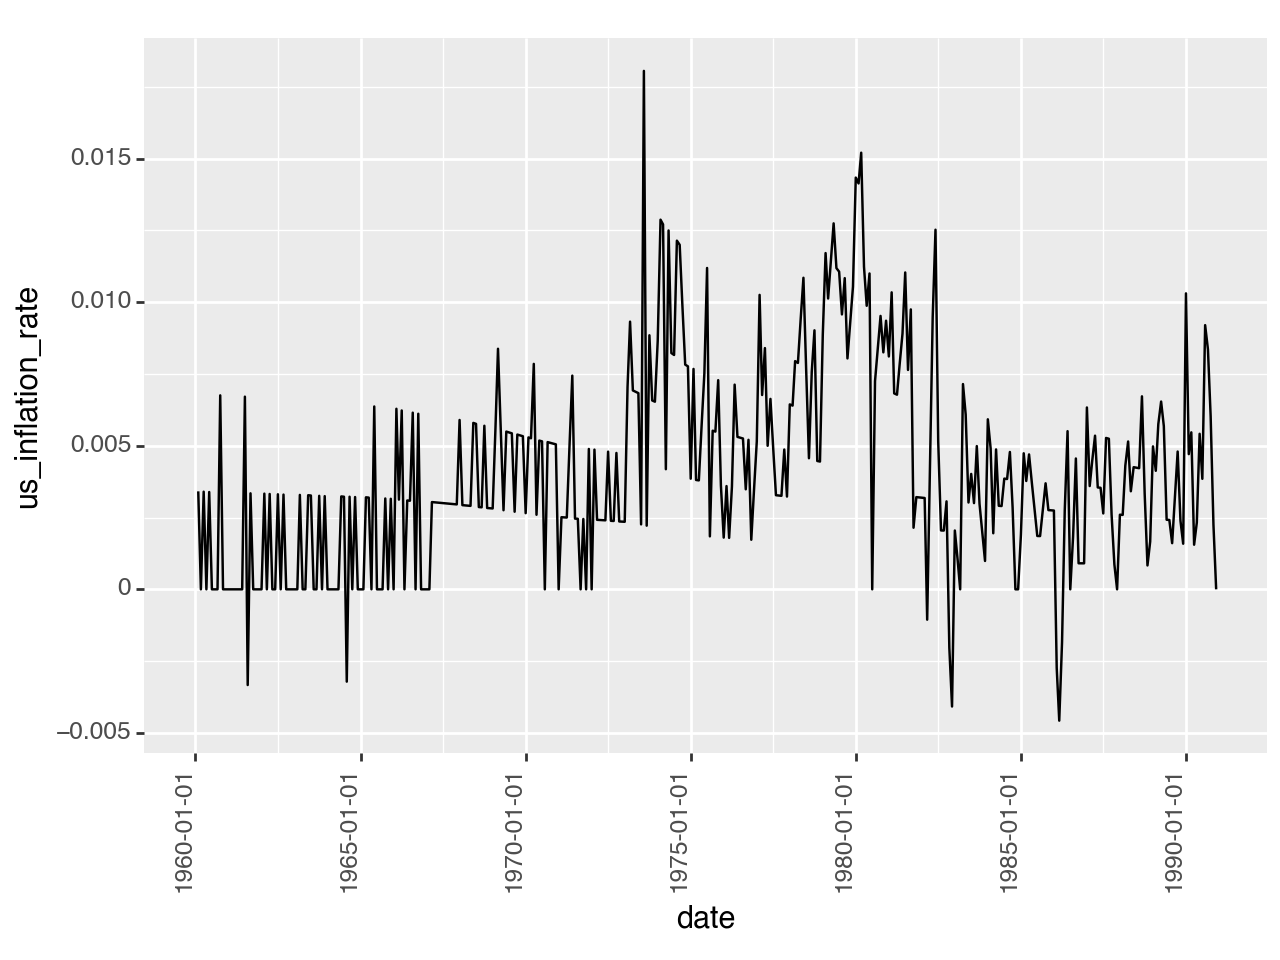

<Figure Size: (640 x 480)>

In [81]:
# plot the data for us_inflation_rate to see if there are any outliers
plot = (
    ggplot(merged_df, aes(x='date', y='us_inflation_rate')) +
    geom_line() +
    theme(axis_text_x = element_text(angle=90, hjust=1))
)

plot

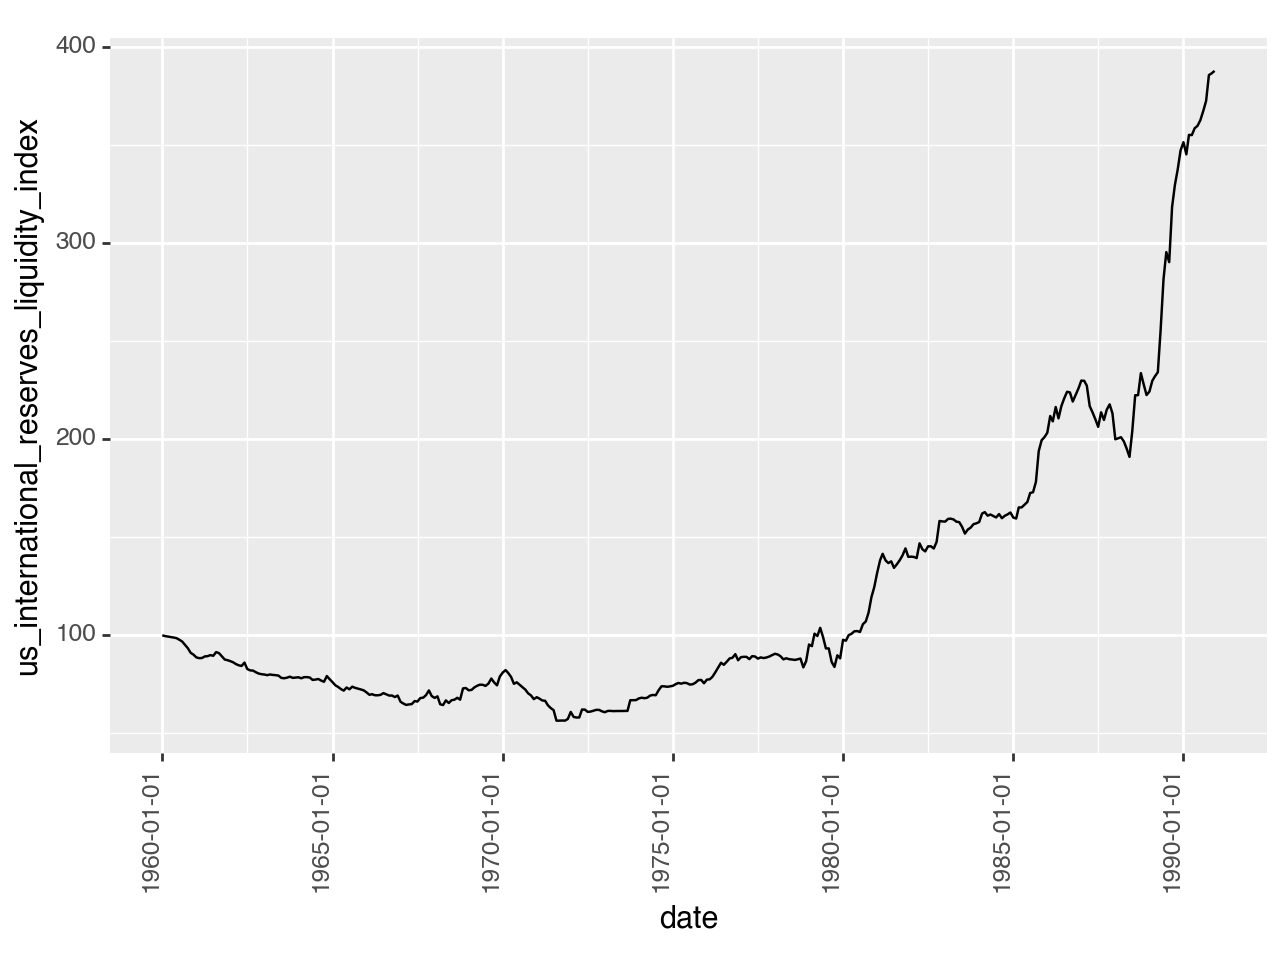

<Figure Size: (640 x 480)>

In [82]:
# plot the data for us_international_reserves_liquidity_index to see if there are any outliers
plot = (
    ggplot(merged_df, aes(x='date', y='us_international_reserves_liquidity_index')) +
    geom_line() +
    theme(axis_text_x = element_text(angle=90, hjust=1))
)
plot

## 3. Analysis

### 3.1 Exchange Rate and International Reserve Graphs

/Users/Yuyao/anaconda3/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 1 rows containing missing values.
/Users/Yuyao/anaconda3/lib/python3.11/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'alpha' aesthetic. Make sure you have mapped a variable to it


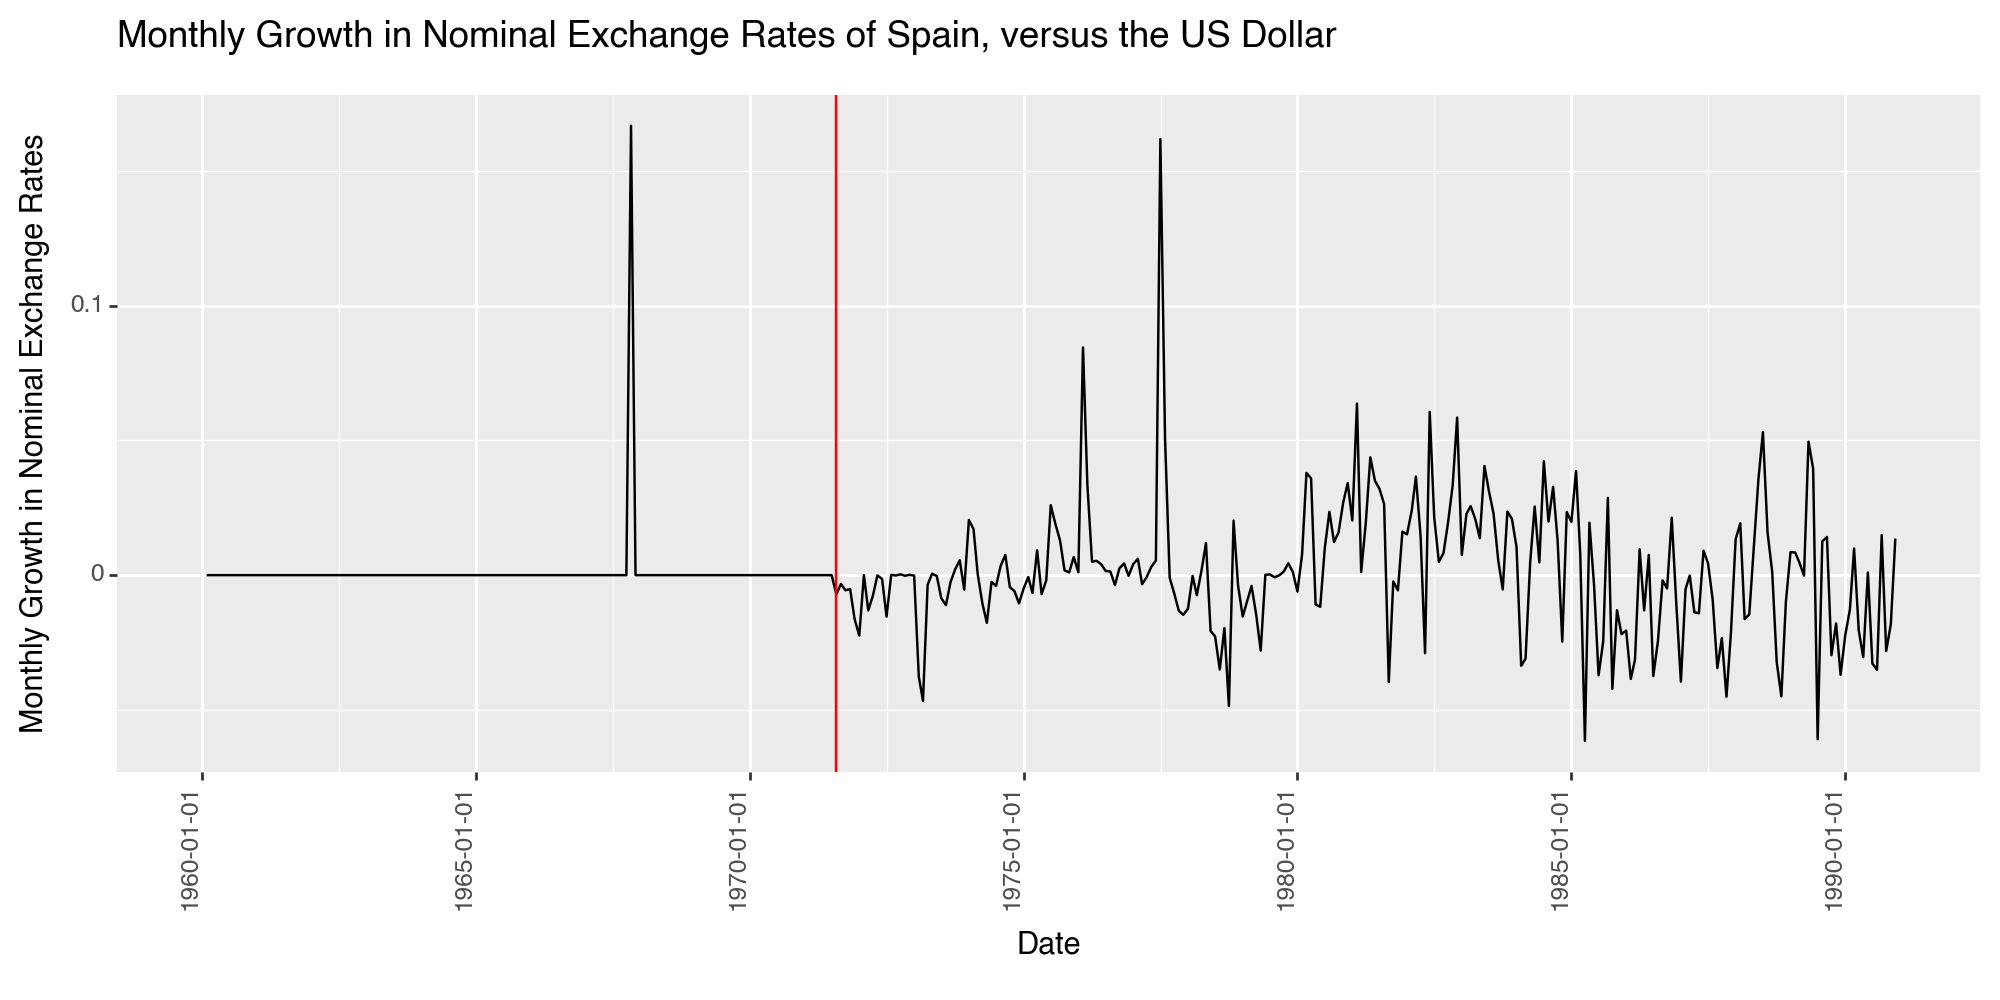

<Figure Size: (1000 x 500)>

In [83]:
# Plot a time series graph of the monthly growth in nominal exchange rates of Spain, versus the US dollar
# insert a vertical line at 1971-08-01 to indicate the end of the Bretton Woods system and label this 

plot = (
    ggplot(merged_df, aes(x='date', y='spain_nominal_exchange_rate_growth')) +
    geom_line() +
    geom_vline(xintercept=pd.to_datetime('1971-08-01'), color='red') +
    labs(title='Monthly Growth in Nominal Exchange Rates of Spain, versus the US Dollar', x='Date', y='Monthly Growth in Nominal Exchange Rates') +
    theme(axis_text_x=element_text(rotation=90, hjust=1)) + 
    theme(figure_size=(10, 5)) + 
    scale_alpha_manual(values={'red': 'red'}, labels=['Bretton Woods Ended'])
    
)
plot

In [84]:
import altair as alt 
# plot an interactive time series graph of the monthly growth in nominal exchange rates of Spain, versus the US dollar
alt.Chart(merged_df).mark_line().encode(
    x='date:T',
    y='spain_nominal_exchange_rate_growth:Q'
).properties(
    title='Monthly Growth in Nominal Exchange Rates of Spain, versus the US Dollar',
    width=800,
    height=400
).interactive() 



alt.Chart(...)

/Users/Yuyao/anaconda3/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


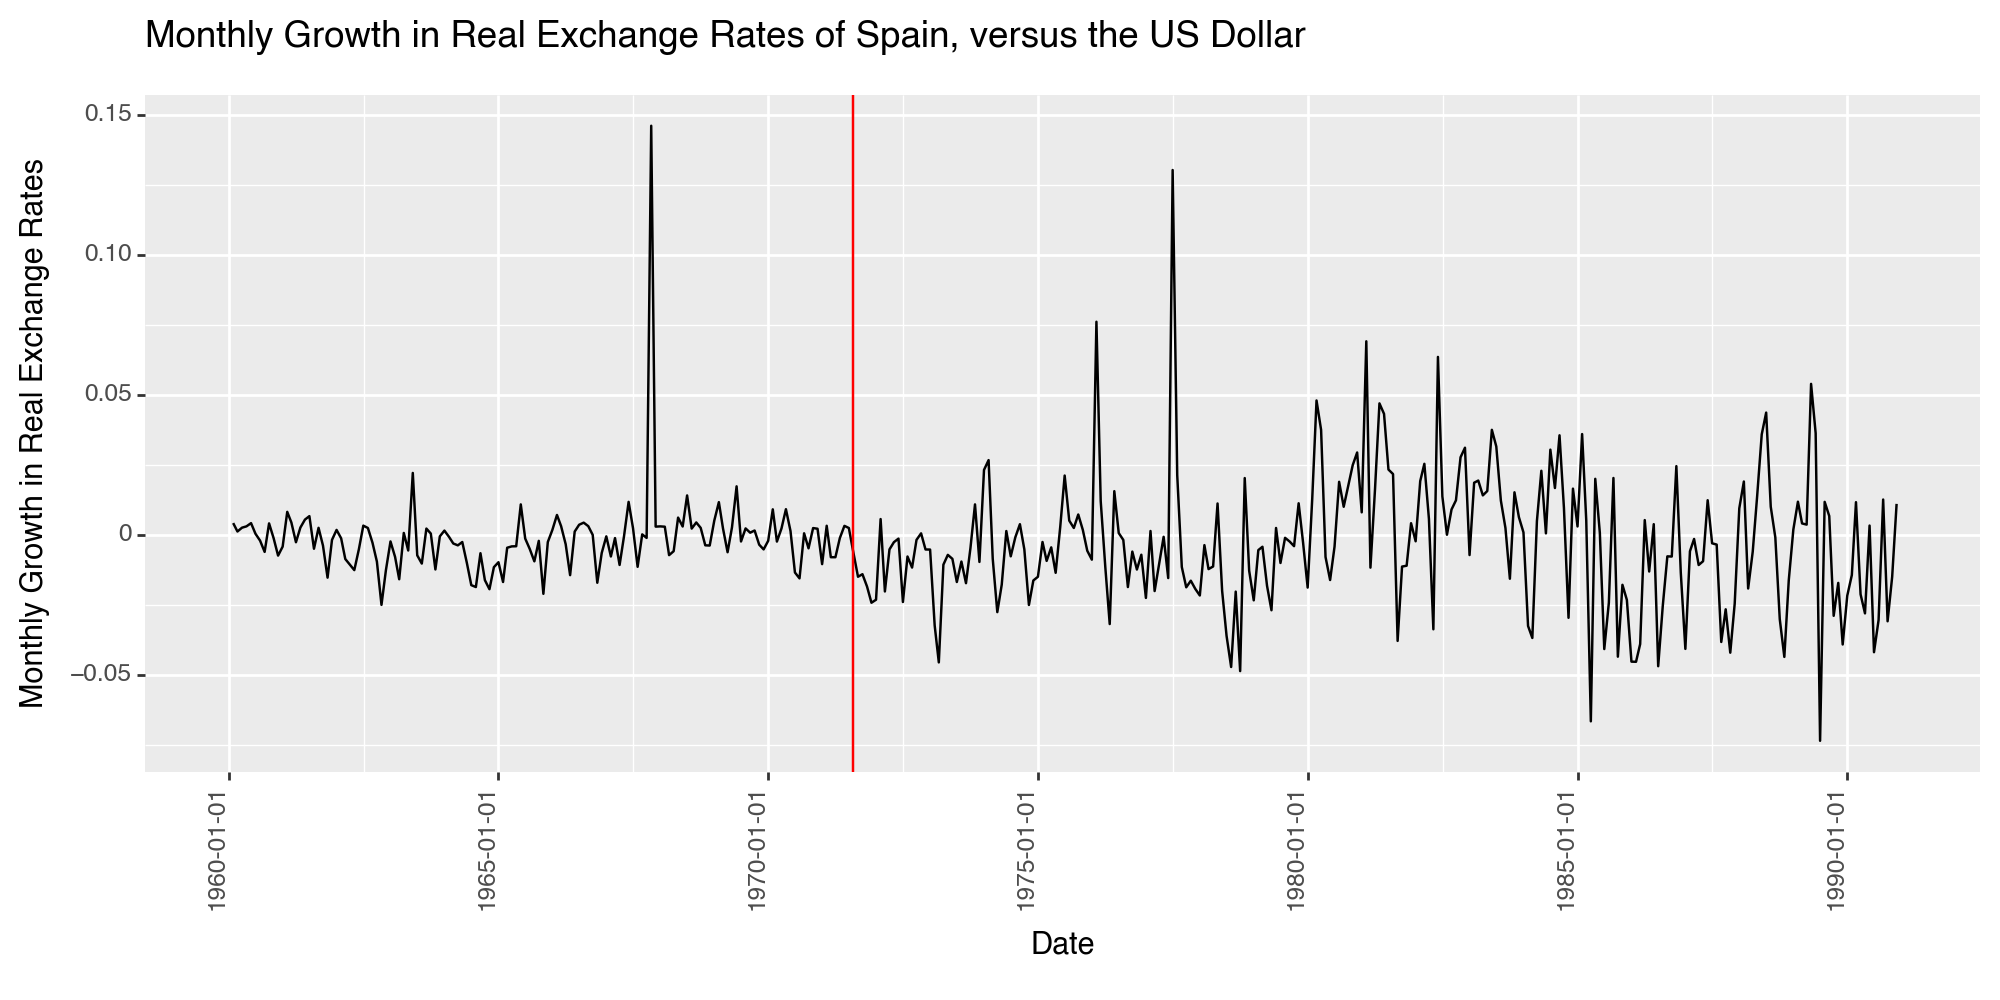

<Figure Size: (1000 x 500)>

In [101]:
# Plot a time series graph of the monthly growth in real exchange rates of Spain, versus the US dollar 
plot = (
    ggplot(merged_df, aes(x='date', y='spain_real_exchange_rate_growth')) +
    geom_line() +
    labs(title='Monthly Growth in Real Exchange Rates of Spain, versus the US Dollar', x='Date', y='Monthly Growth in Real Exchange Rates') +
    theme(axis_text_x=element_text(rotation=90, hjust=1)) +
    geom_vline(xintercept=pd.to_datetime('1971-08-01'), color='red') + 
    theme(figure_size=(10, 5))
)
plot

/Users/Yuyao/anaconda3/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 1 rows containing missing values.
/Users/Yuyao/anaconda3/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


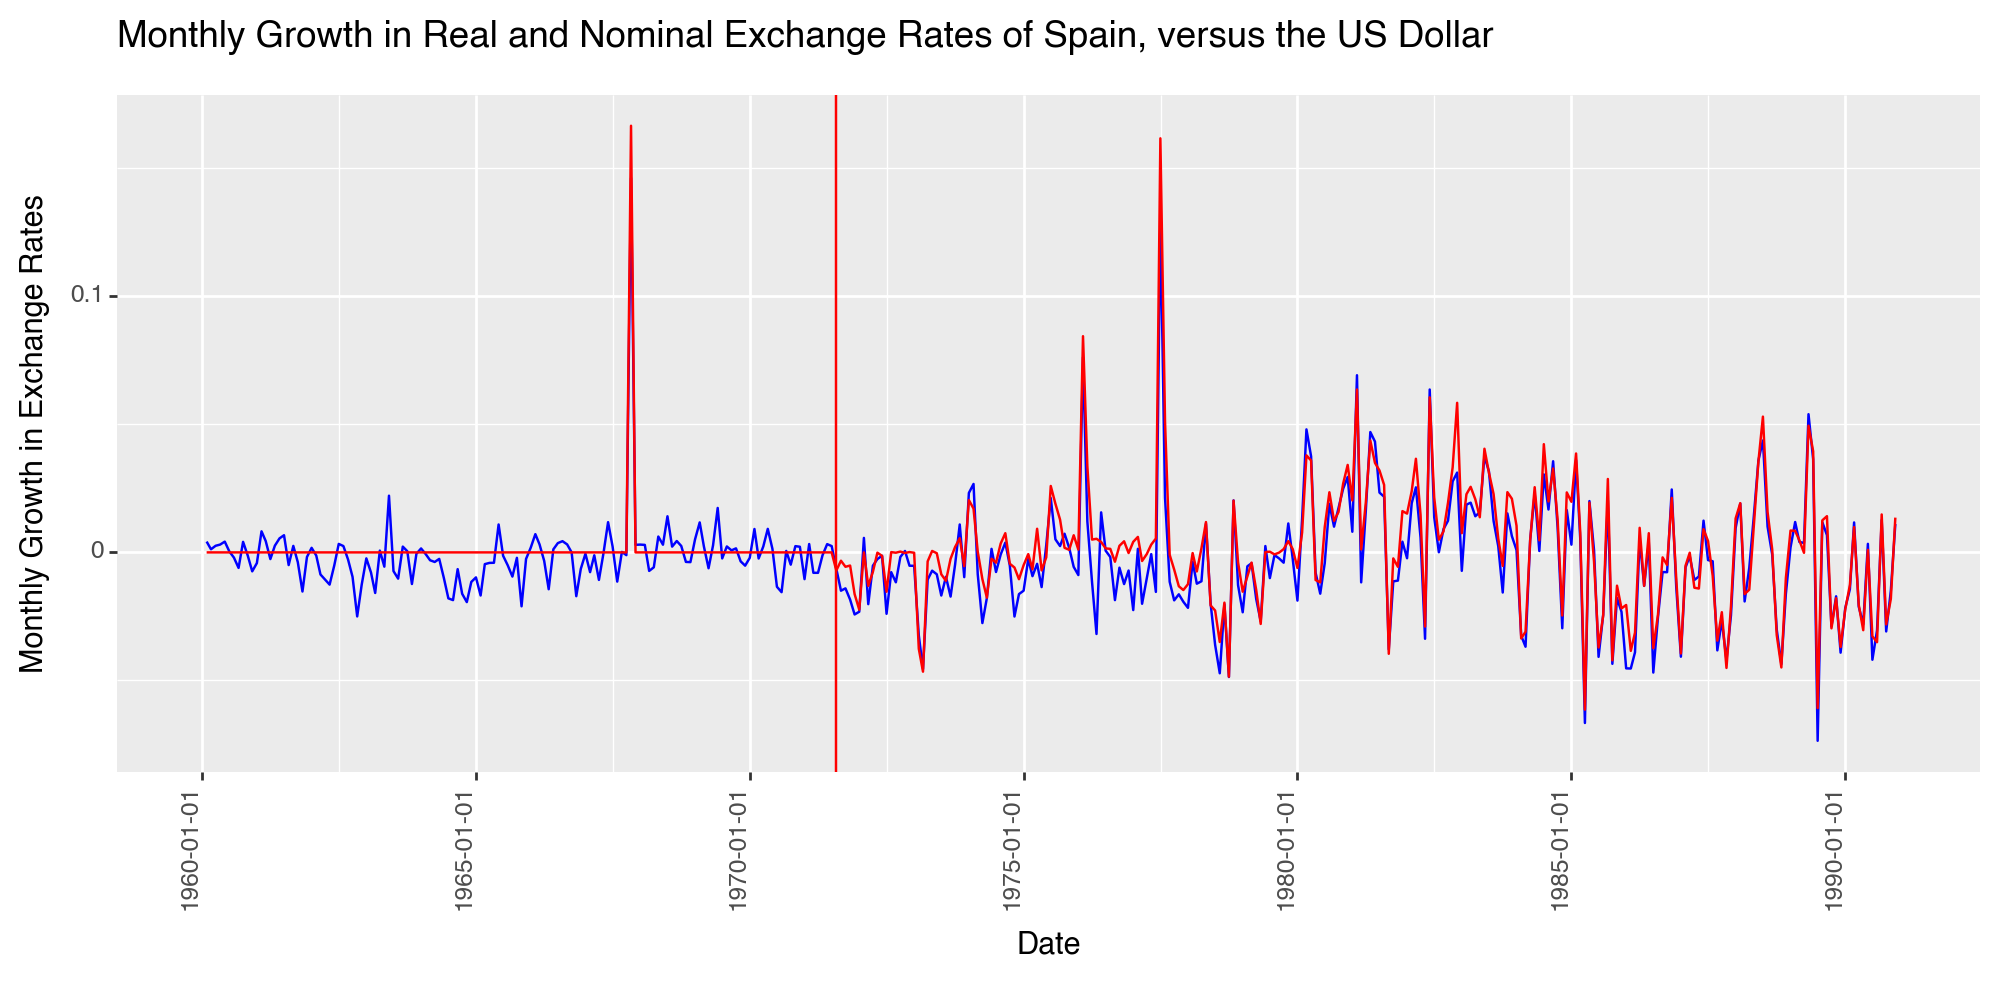

<Figure Size: (1000 x 500)>

In [102]:
# plot monthly growth in real and nominal exchange rates in the same graph 

plot = (
    ggplot(merged_df, aes(x='date')) +
    geom_line(aes(y='spain_real_exchange_rate_growth'), color='blue') +
    geom_line(aes(y='spain_nominal_exchange_rate_growth'), color='red') +
    labs(title='Monthly Growth in Real and Nominal Exchange Rates of Spain, versus the US Dollar', x='Date', y='Monthly Growth in Exchange Rates') +
    theme(axis_text_x=element_text(rotation=90, hjust=1)) +
    geom_vline(xintercept=pd.to_datetime('1971-08-01'), color='red') + 
    theme(figure_size=(10, 5))
)

plot

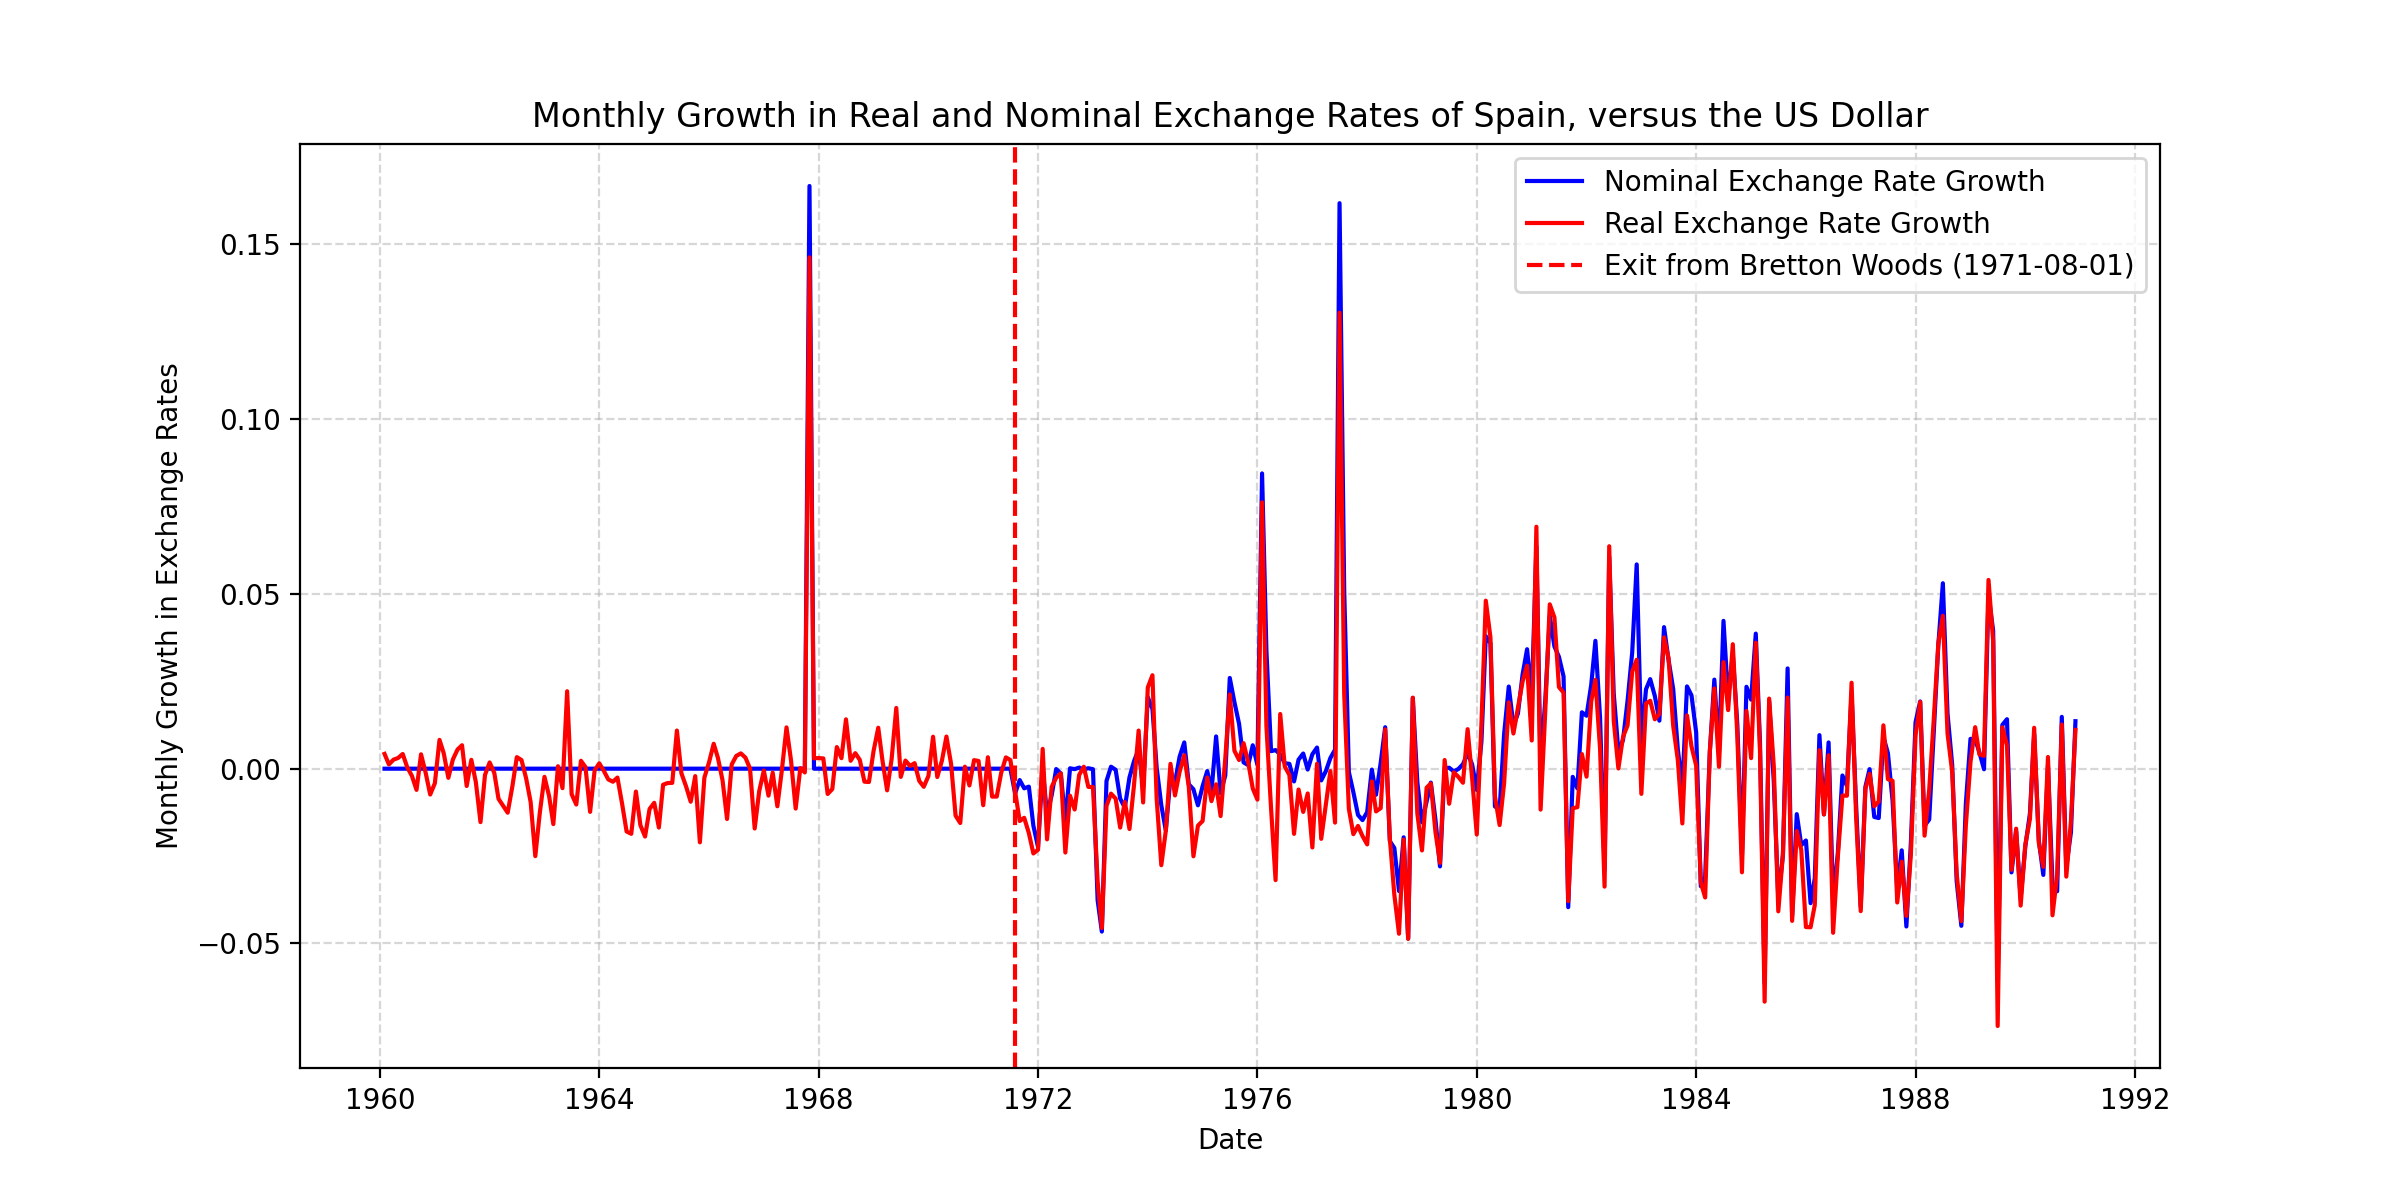

In [87]:
# plot monthly growth in real and nominal exchange rates in the same graph using matplotlib

plt.plot(merged_df['date'], merged_df['spain_nominal_exchange_rate_growth'], label='Nominal Exchange Rate Growth', color='blue')
plt.plot(merged_df['date'], merged_df['spain_real_exchange_rate_growth'], label='Real Exchange Rate Growth', color='red')
plt.axvline(pd.to_datetime('1971-08-01'), color='red', linestyle='--', label='Exit from Bretton Woods (1971-08-01)')

plt.legend()
plt.title('Monthly Growth in Real and Nominal Exchange Rates of Spain, versus the US Dollar')
plt.xlabel('Date')
plt.ylabel('Monthly Growth in Exchange Rates')
plt.gcf().set_size_inches(12, 6)
plt.grid(True, linestyle='--', alpha=0.5)


plt.show()

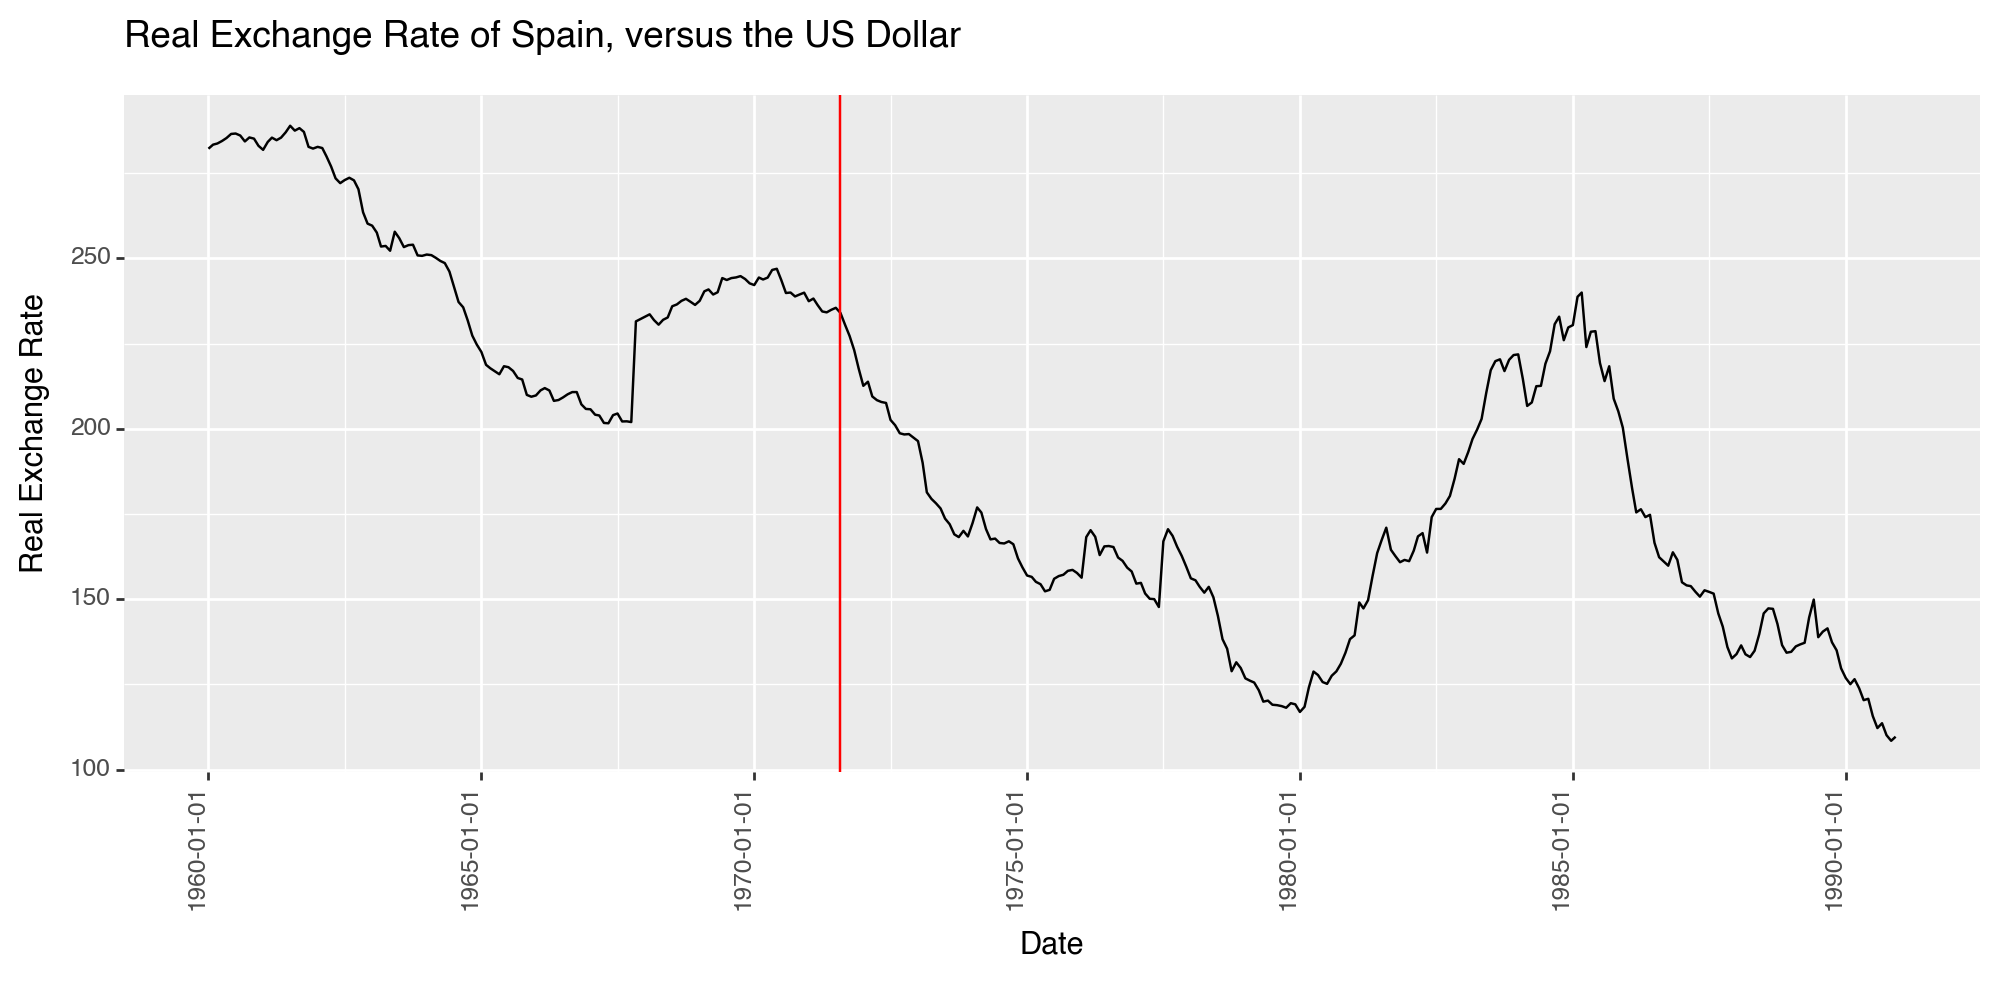

<Figure Size: (1000 x 500)>

In [103]:
# Plot a time series graph of the real exchange rate level of Spain, versus the US dollar
plot = (
    ggplot(merged_df, aes(x='date', y='spain_real_exchange_rate')) +
    geom_line() +
    labs(title='Real Exchange Rate of Spain, versus the US Dollar', x='Date', y='Real Exchange Rate') +
    theme(axis_text_x=element_text(rotation=90, hjust=1)) +
    geom_vline(xintercept=pd.to_datetime('1971-08-01'), color='red') + 
    theme(figure_size=(10, 5))
)
plot

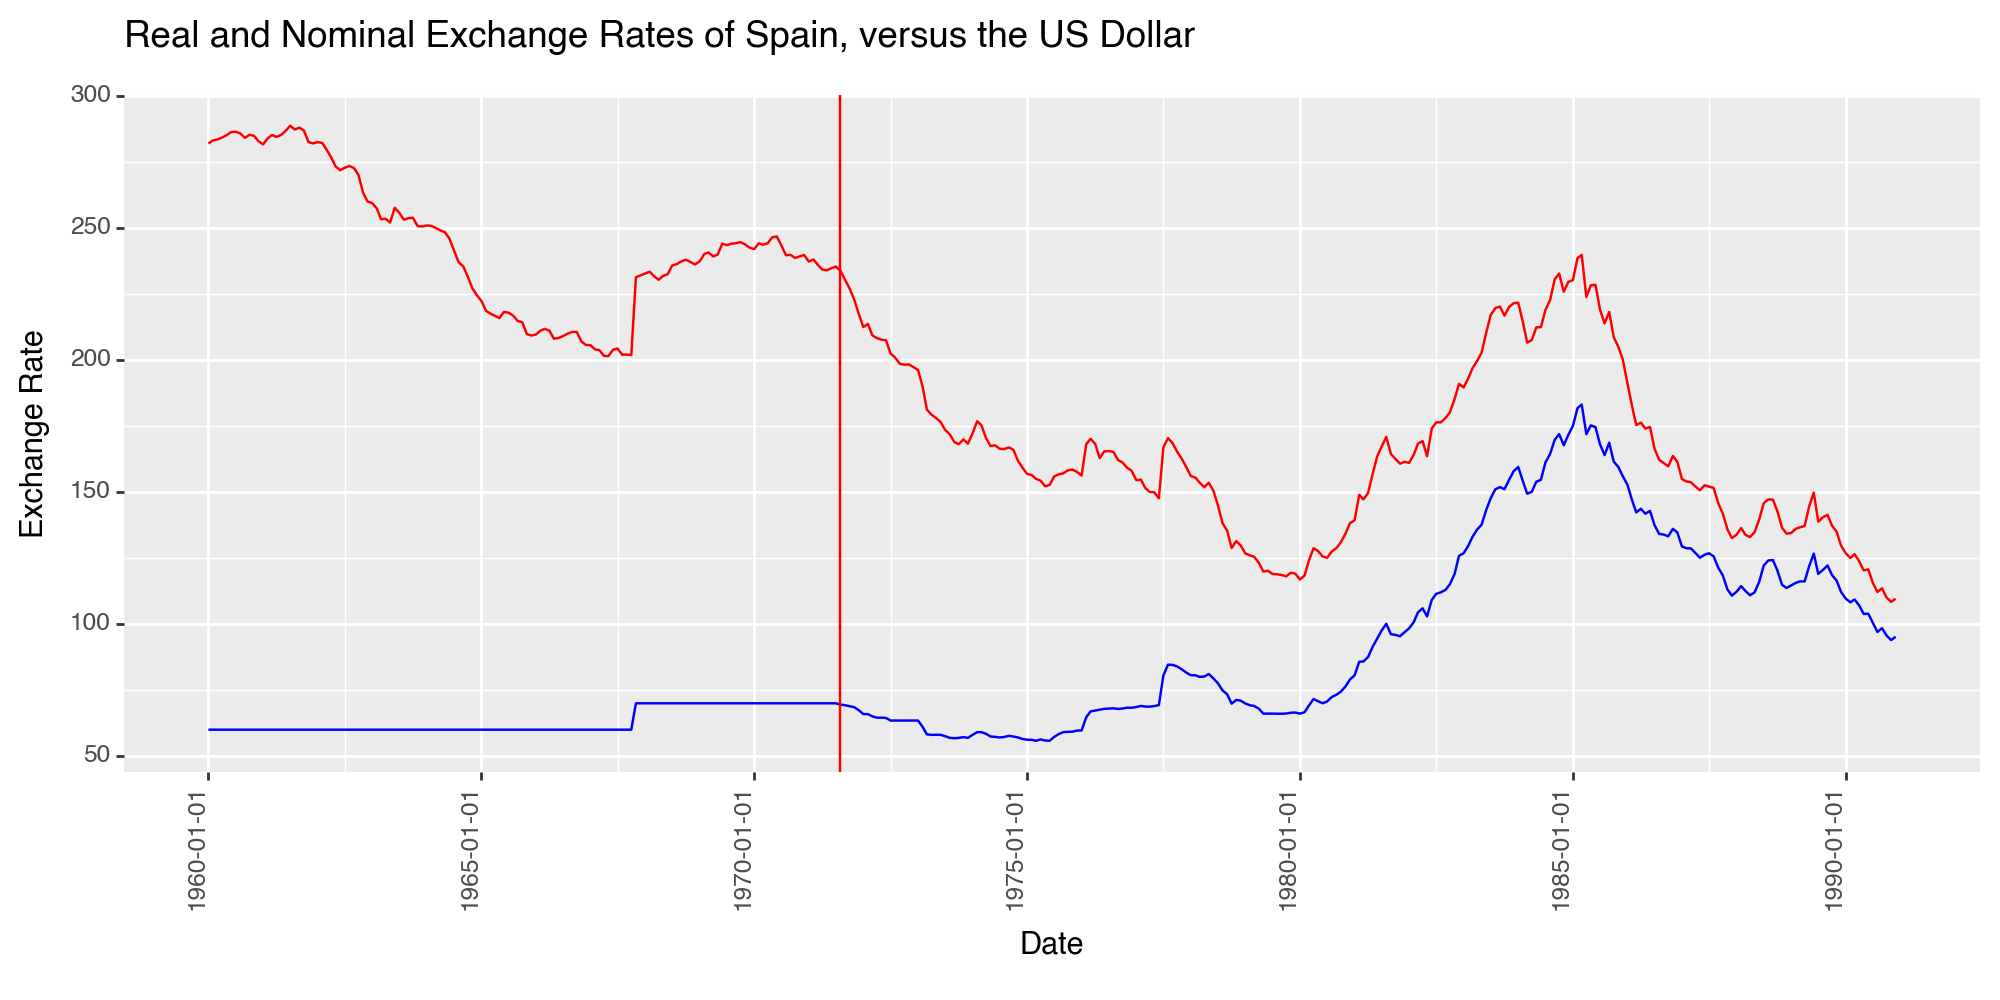

<Figure Size: (1000 x 500)>

In [104]:
# plot a time series graph of the real and nominal exchange rates in the same graph
plot = (
    ggplot(merged_df, aes(x='date')) +
    geom_line(aes(y='spain_exchange_rates_per_USD'), color='blue') +
    geom_line(aes(y='spain_real_exchange_rate'), color='red') +
    labs(title='Real and Nominal Exchange Rates of Spain, versus the US Dollar', x='Date', y='Exchange Rate') +
    theme(axis_text_x=element_text(rotation=90, hjust=1)) +
    geom_vline(xintercept=pd.to_datetime('1971-08-01'), color='red') + 
    theme(figure_size=(10, 5))
)

plot

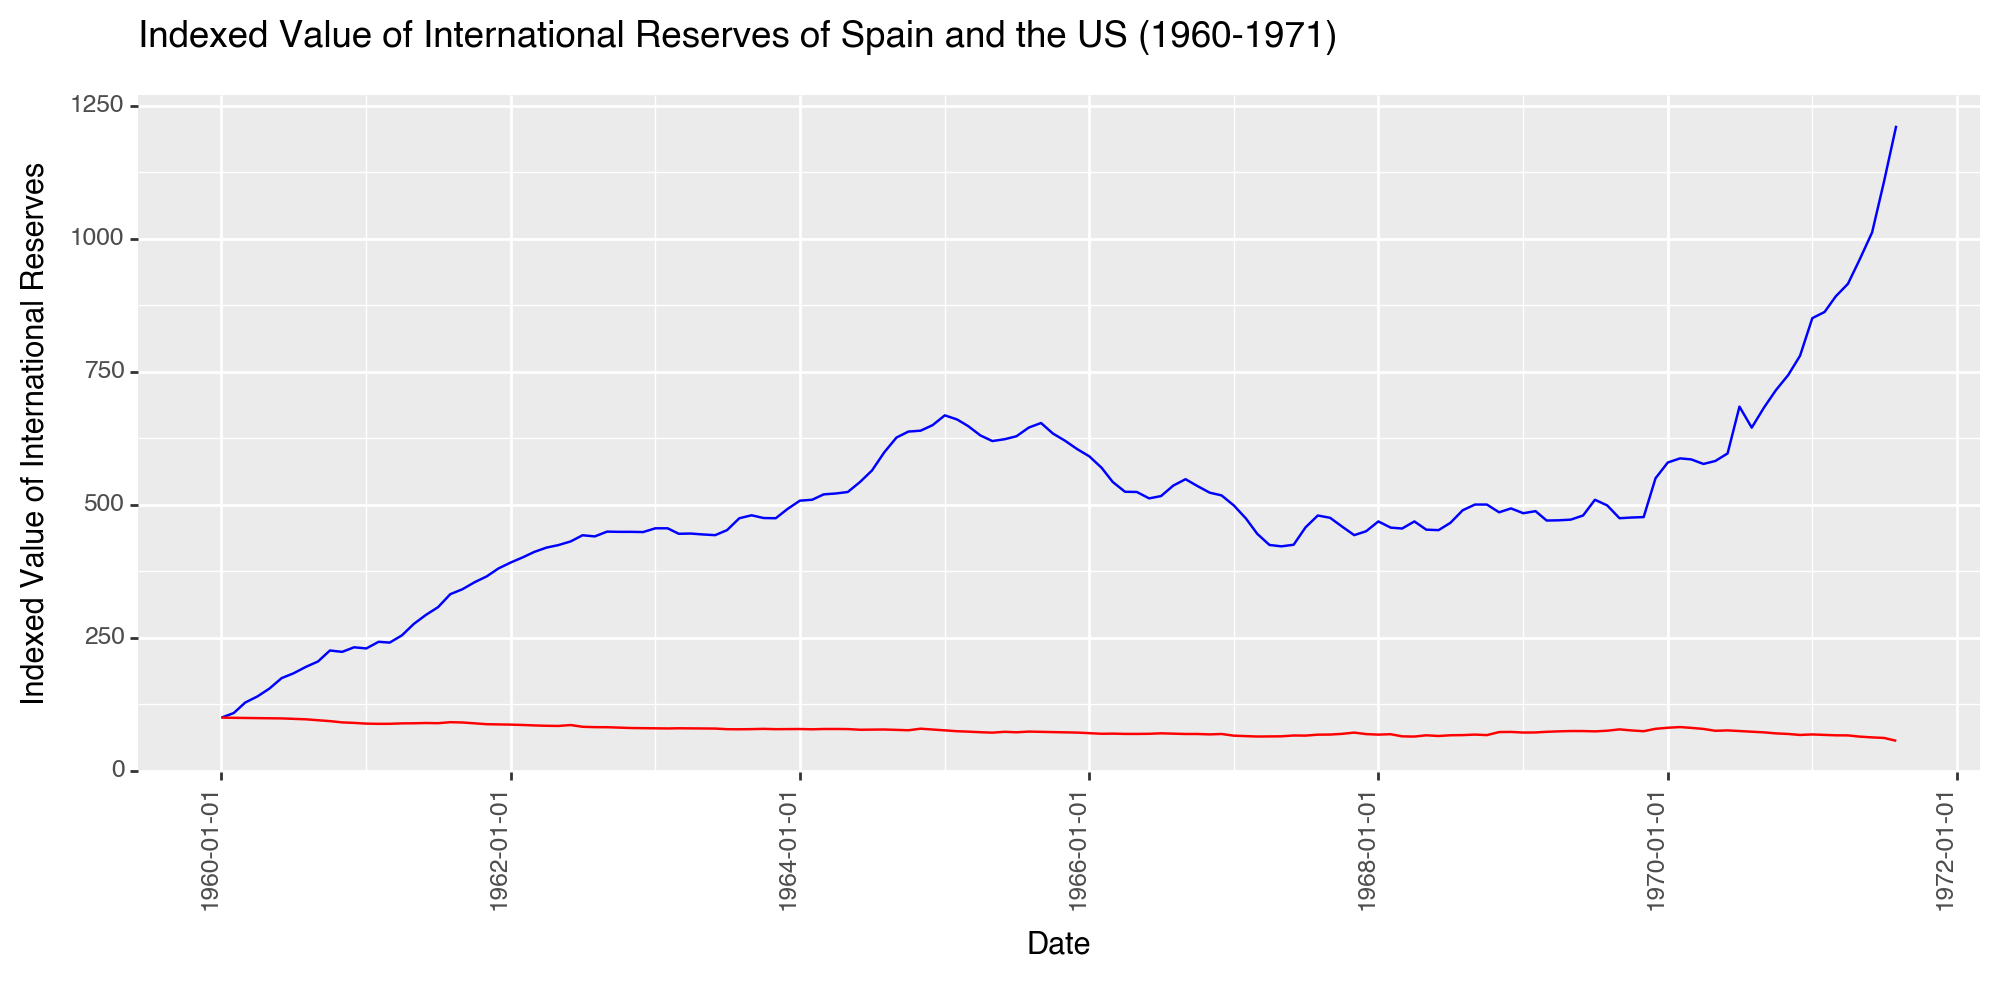

In [105]:
# Filter the DataFrame for the desired time frame
filtered_df = merged_df[(merged_df['date'] >= '1960-01-01') & (merged_df['date'] <= '1971-08-31')]

# Plot a time series graph of the monthly indexed value of international reserves of Spain and the US from January 1960 until August 1971 (when the US exited the Bretton Woods system)
plot = (
    ggplot(filtered_df, aes(x='date')) +
    geom_line(aes(y='spain_international_reserves_liquidity_index'), color='blue') +
    geom_line(aes(y='us_international_reserves_liquidity_index'), color='red') +
    labs(title='Indexed Value of International Reserves of Spain and the US (1960-1971)', x='Date', y='Indexed Value of International Reserves') +
    theme(axis_text_x=element_text(rotation=90, hjust=1)) + 
    theme(figure_size=(10, 5))
)
print(plot)

In [91]:
# plot a time series graph of the monthly indexed value of international reserves of Spain and the US from January 1960 until August 1971 (when the US exited the Bretton Woods system) using Altair
alt.Chart(filtered_df).mark_line().encode(
    x='date:T',
    y='spain_international_reserves_liquidity_index:Q',
    color=alt.value('blue')
) + alt.Chart(filtered_df).mark_line().encode(
    x='date:T',
    y='us_international_reserves_liquidity_index:Q',
    color=alt.value('red')
).properties(
    title='Indexed Value of International Reserves of Spain and the US (1960-1971)',
    width=800,
    height=400
).interactive()

alt.LayerChart(...)

### 3.2 Inflation and Industrial Production Graphs

/Users/Yuyao/anaconda3/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


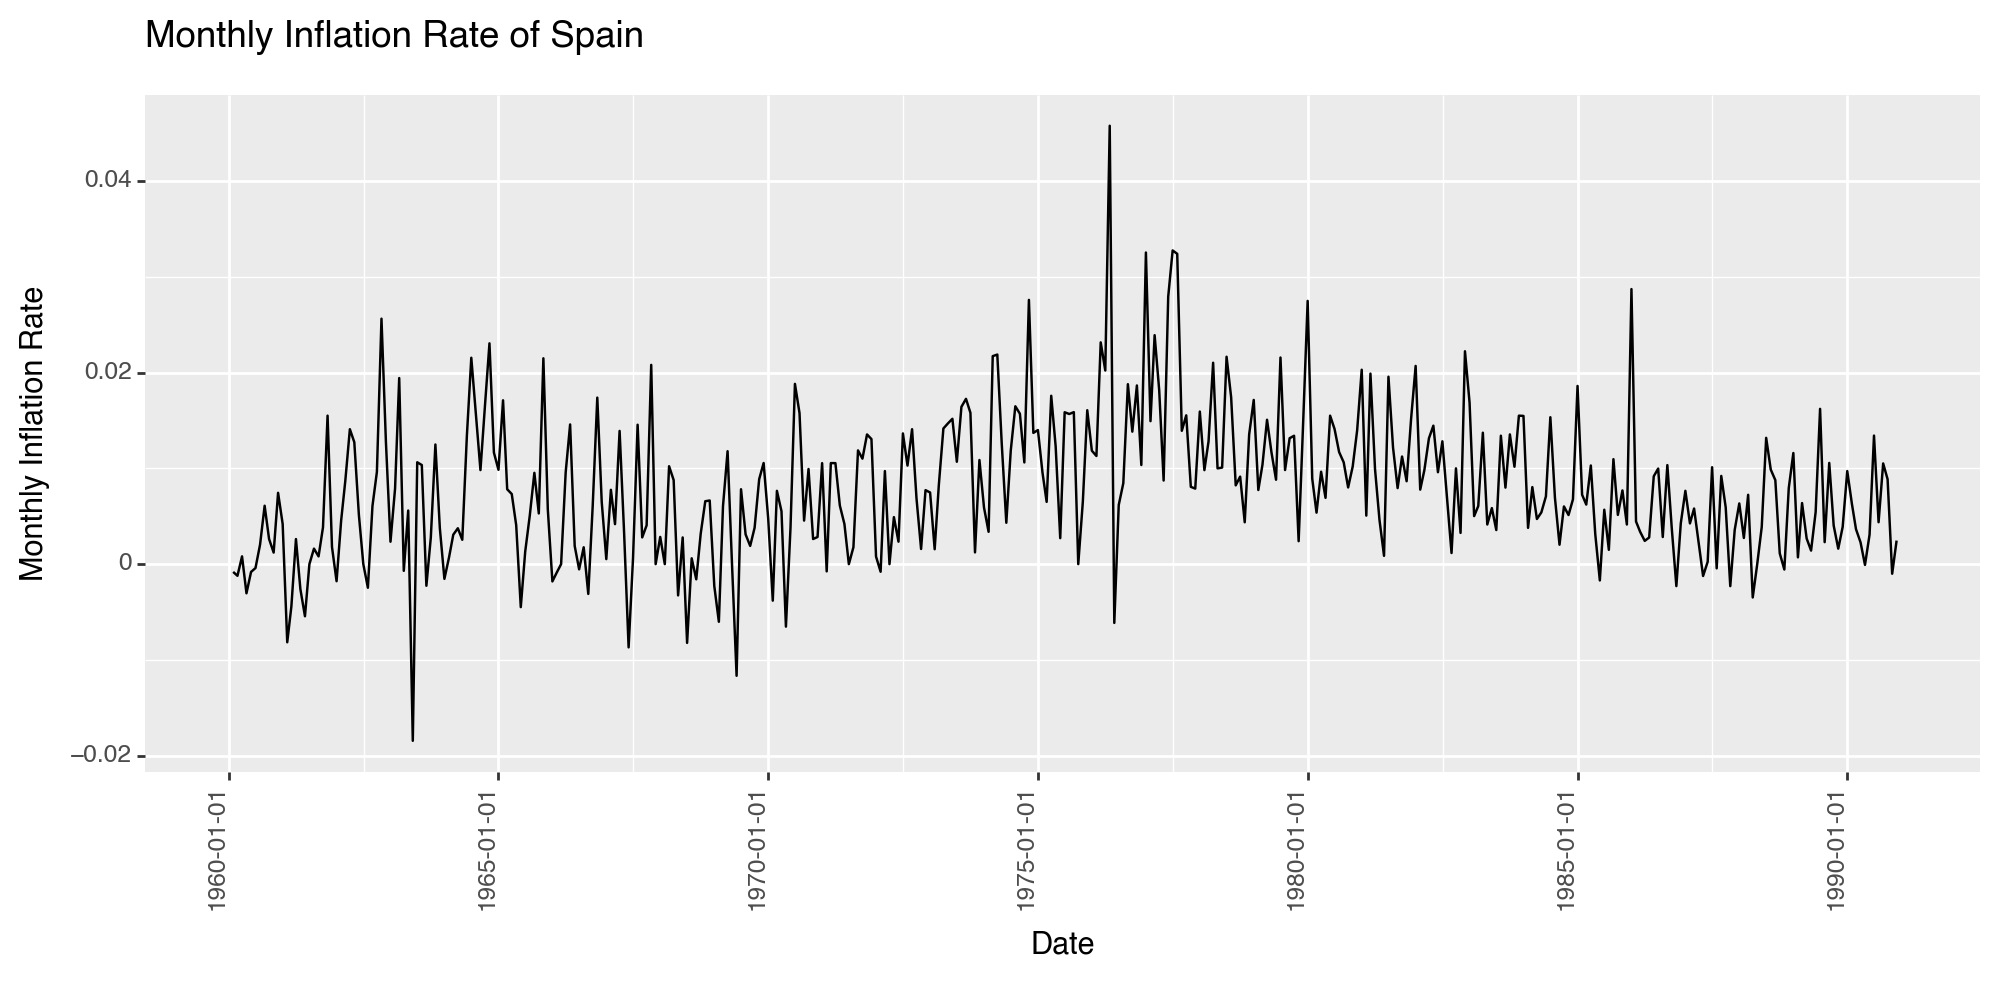

<Figure Size: (1000 x 500)>

In [106]:
# Plot a time series graph of monthly inflation
plot = (
    ggplot(merged_df, aes(x='date', y='spain_inflation_rate')) +
    geom_line() +
    labs(title='Monthly Inflation Rate of Spain', x='Date', y='Monthly Inflation Rate') +
    theme(axis_text_x=element_text(rotation=90, hjust=1)) + 
    theme(figure_size=(10, 5))
)
plot

/Users/Yuyao/anaconda3/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 13 rows containing missing values.


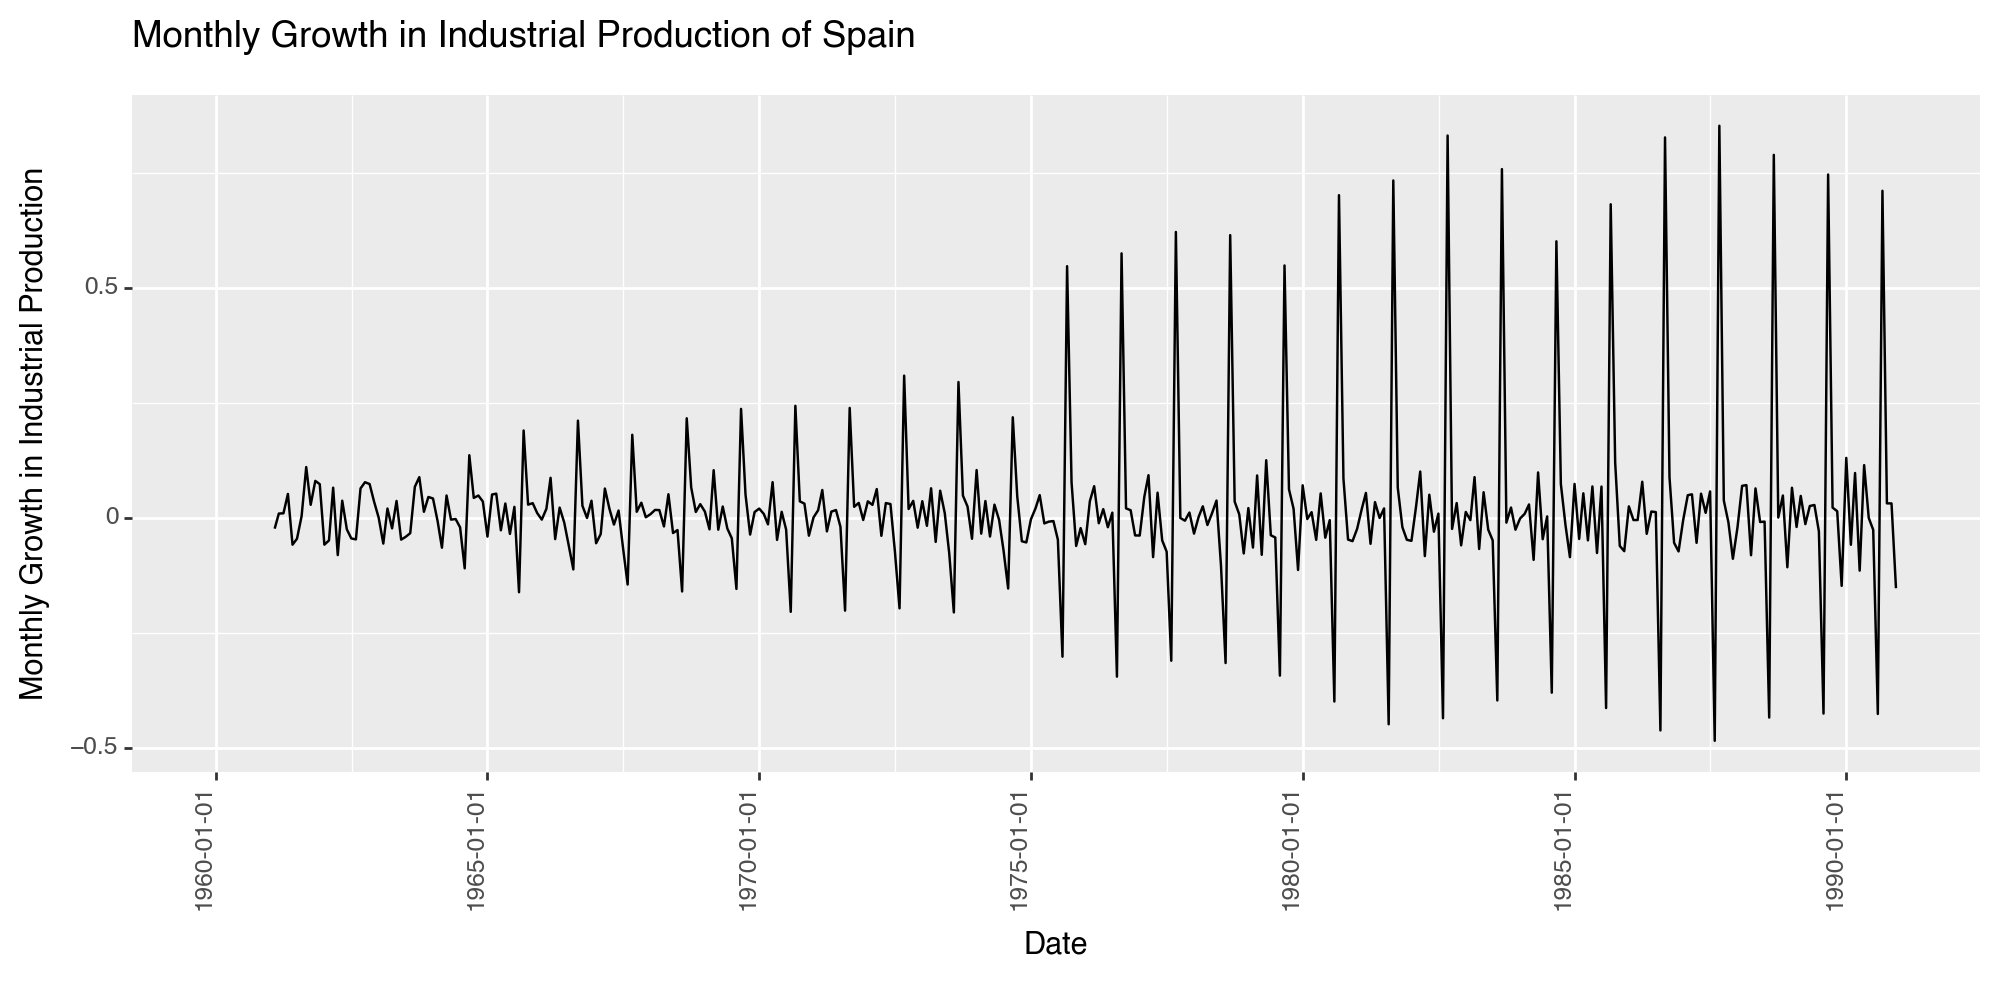

<Figure Size: (1000 x 500)>

In [107]:
# Plot a time series graph of the monthly growth in industrial production
plot = (
    ggplot(merged_df, aes(x='date', y='spain_industrial_production_growth')) +
    geom_line() +
    labs(title='Monthly Growth in Industrial Production of Spain', x='Date', y='Monthly Growth in Industrial Production') +
    theme(axis_text_x=element_text(rotation=90, hjust=1)) + 
    theme(figure_size=(10, 5))
)
plot

/Users/Yuyao/anaconda3/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 24 rows containing missing values.


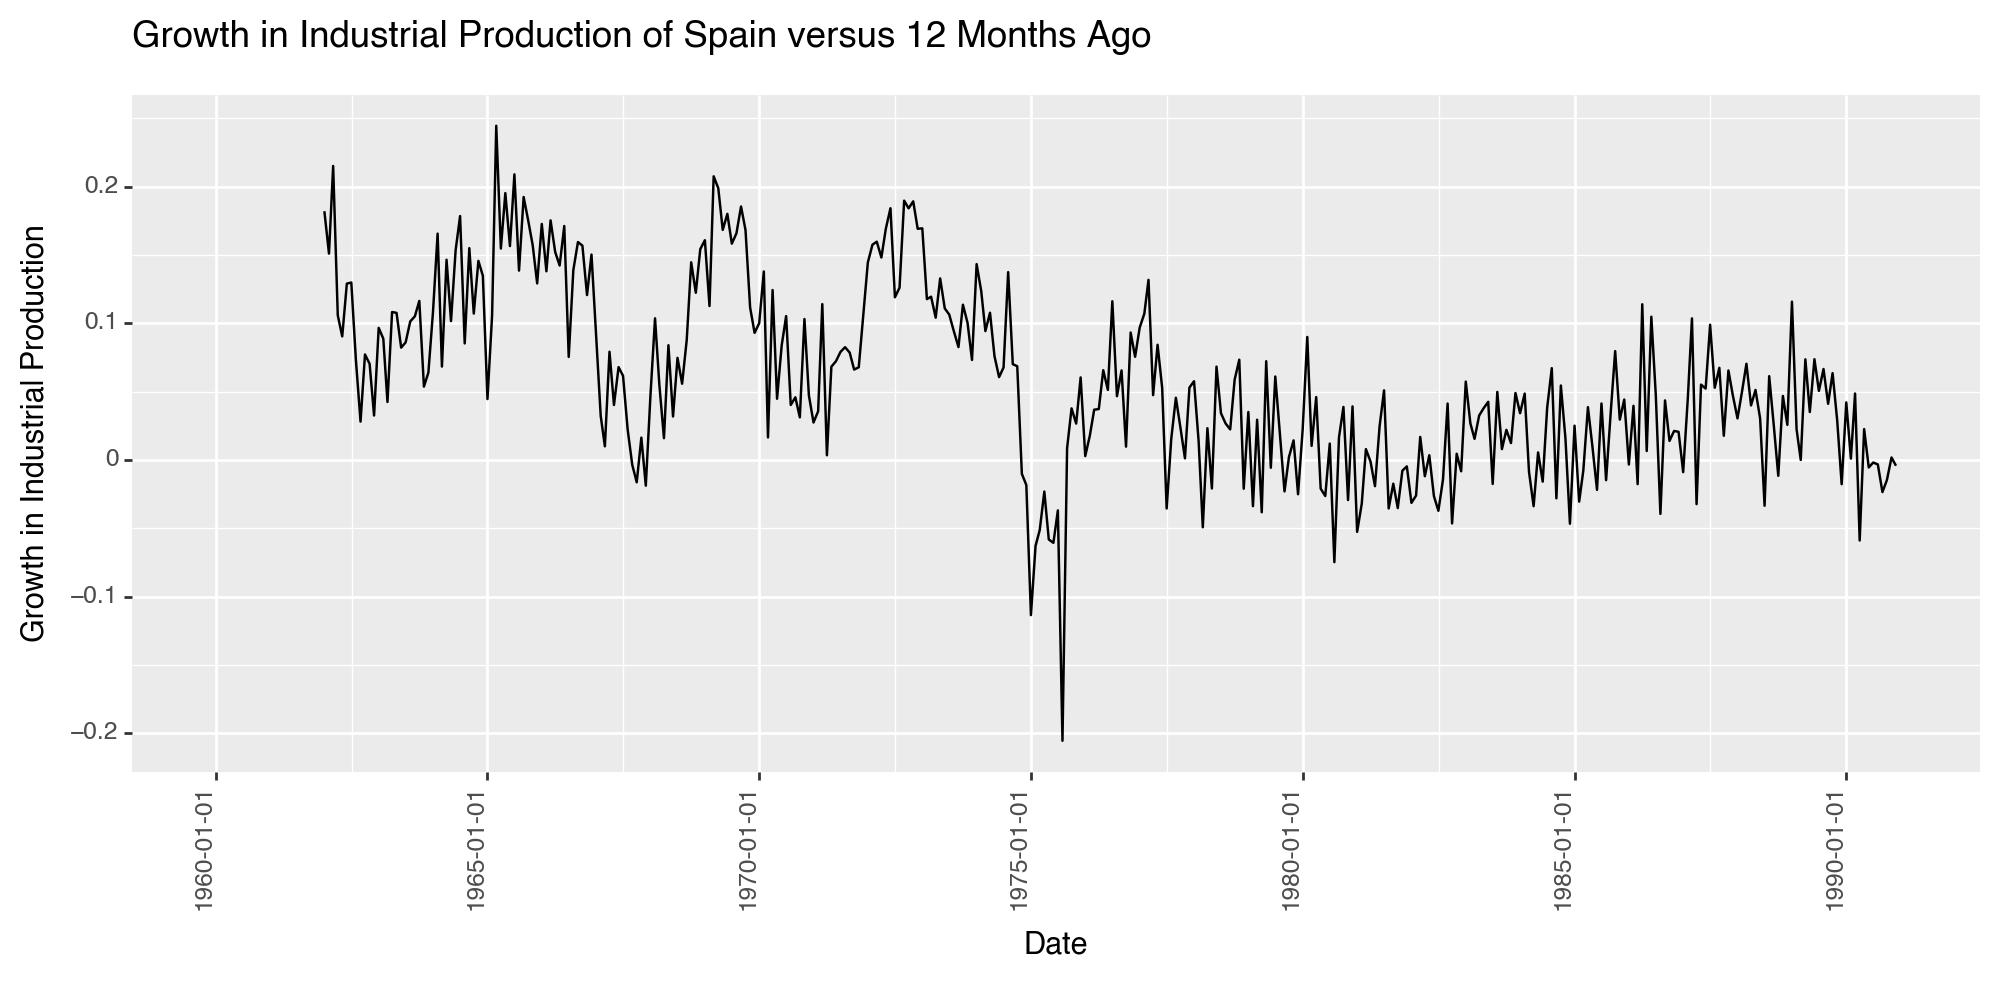

<Figure Size: (1000 x 500)>

In [108]:
# Plot a time series graph of the growth in industrial production versus 12 months ago
plot = (
    ggplot(merged_df, aes(x='date', y='spain_industrial_production_growth_vs_12_months_ago')) +
    geom_line() +
    labs(title='Growth in Industrial Production of Spain versus 12 Months Ago', x='Date', y='Growth in Industrial Production') +
    theme(axis_text_x=element_text(rotation=90, hjust=1)) + 
    theme(figure_size=(10, 5))
)
plot

### Comparison Statistics 

Separately for both the period before and after Bretton Woods, calculate the standard deviation
of:
– The monthly growth of nominal exchange rates versus the US dollar.
– The monthly growth of real exchange rates versus the US dollar.
– The inflation rate in your country.
– The difference between the inflation in your country versus the United States.
– The 12-monthly industrial production growth.

When you calculate the standard deviation of variables before Bretton Woods, include data up to 07/1971. When you calculate the standard deviation of variables after Bretton Woods, only include data from 01/1973.

Report these numbers in a suitably formatted table, as well as the ratio of the standard deviation of each variable before and after Bretton Woods.

Why might it be a good idea to exclude data from 08/1971 to 12/1972 for the above calculations?


In [95]:
# find the difference between the inflation in Spain and the US
merged_df["inflation_diff"] = merged_df['spain_inflation_rate'] - merged_df['us_inflation_rate']
merged_df

,date,spain_industrial_production,spain_exchange_rates_per_USD,spain_international_reserves_liquidity,spain_consumer_prices,us_international_reserves_liquidity,us_consumer_prices,spain_nominal_exchange_rate_growth,spain_real_exchange_rate,spain_real_exchange_rate_growth,spain_inflation_rate,spain_industrial_production_growth,spain_industrial_production_growth_vs_12_months_ago,spain_international_reserves_liquidity_index,spain_real_exchange_rate_index,us_inflation_rate,us_international_reserves_liquidity_index,inflation_diff
0,1960-01-01,NaN,60.000,233.000000,2.857368,21478.100000,13.436946,NaN,282.153680,NaN,NaN,NaN,NaN,100.000000,1.218834,NaN,100.000000,NaN
1,1960-02-01,NaN,60.000,253.000000,2.855049,21395.700000,13.482806,0.000000,283.346534,0.004228,-0.000811,NaN,NaN,108.583691,1.223987,0.003413,99.616353,-0.004224
2,1960-03-01,NaN,60.000,299.000000,2.851573,21344.700000,13.482806,0.000000,283.691987,0.001219,-0.001218,NaN,NaN,128.326180,1.225479,0.000000,99.378902,-0.001218
3,1960-04-01,NaN,60.000,326.000000,2.853891,21278.000000,13.528666,0.000000,284.425709,0.002586,0.000813,NaN,NaN,139.914163,1.228649,0.003401,99.068353,-0.002588
4,1960-05-01,NaN,60.000,360.000000,2.845198,21234.300000,13.528666,0.000000,285.294743,0.003055,-0.003046,NaN,NaN,154.506438,1.232403,0.000000,98.864890,-0.003046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,1990-08-01,57.138375,97.029,53227.717281,52.200576,78908.838357,60.351608,-0.035075,112.179914,-0.030444,0.004383,-0.426276,-0.003284,22844.513855,0.484590,0.009202,367.392080,-0.004820
368,1990-09-01,97.803577,98.467,53790.187718,52.750025,80024.166133,60.856066,0.014820,113.598321,0.012644,0.010526,0.711697,-0.023496,23085.917475,0.490717,0.008359,372.584941,0.002167
369,1990-10-01,100.909947,95.697,55428.040577,53.218335,82852.196532,61.222946,-0.028131,110.090860,-0.030876,0.008878,0.031761,-0.014706,23788.858617,0.475565,0.006029,385.751982,0.002849
370,1990-11-01,104.110449,93.958,56347.862332,53.165017,83059.402774,61.360525,-0.018172,108.441839,-0.014979,-0.001002,0.031716,0.001812,24183.631902,0.468442,0.002247,386.716715,-0.003249


In [96]:
sd_columns = ['spain_nominal_exchange_rate_growth', 'spain_real_exchange_rate_growth', 'spain_inflation_rate', 'inflation_diff', 'spain_industrial_production_growth_vs_12_months_ago']

# filter the dataframe for before and after Bretton Woods periods 
before_bw_df = merged_df[merged_df['date'] <= '1971-07-01']
after_bw_df = merged_df[merged_df['date'] >= '1973-01-01']

# calculate the standard deviation for each column before and after Bretton Woods
before_bw_std = before_bw_df[sd_columns].std()
after_bw_std = after_bw_df[sd_columns].std()

# calculate the ratio of the standard deviation after and before Bretton Woods
std_ratio = after_bw_std / before_bw_std

# create a dataframe to store the standard deviation before and after Bretton Woods and the ratio of the standard deviation
std_df = pd.DataFrame({
    'before_bw_std': before_bw_std,
    'after_bw_std': after_bw_std,
    'std_ratio': std_ratio
})

std_df


,before_bw_std,after_bw_std,std_ratio
spain_nominal_exchange_rate_growth,0.014188,0.025758,1.815514
spain_real_exchange_rate_growth,0.014802,0.025329,1.711221
spain_inflation_rate,0.007231,0.007409,1.024708
inflation_diff,0.007872,0.007479,0.950097
spain_industrial_production_growth_vs_12_months_ago,0.056866,0.050470,0.887534
